In [680]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm

from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score

# 1. Chargement des données et standardisation

## 1.2. Chargement des données

In [2]:
data = pd.read_csv("data_for_clustering_clean.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96096 entries, 0 to 96095
Data columns (total 34 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   customer_unique_id                                96096 non-null  object 
 1   mean_payment_sequential                           96096 non-null  float64
 2   mean_payment_installments                         96096 non-null  float64
 3   nb_product_categ                                  96096 non-null  int64  
 4   last_review_score                                 96096 non-null  int64  
 5   Recency(days)                                     96096 non-null  float64
 6   nb_orders                                         96096 non-null  int64  
 7   Frequency(days)                                   96096 non-null  float64
 8   mean_order_amount                                 96096 non-null  float64
 9   mean_nb_items    

In [5]:
data = data.set_index('customer_unique_id')

## 1.2. Standardisation

In [10]:
data_std = data.copy()

for f in data_std.columns.tolist():
    print('mean {} AVANT standardisation = '.format(f),
          round(data_std[f].mean(),2))
    print('standard deviation {} AVANT standardisation = '.format(f),
          round(data_std[f].std(),2))
    print('min {} AVANT standardisation = '.format(f),
          round(data_std[f].min(),2))
    print('max {} AVANT standardisation = '.format(f),
          round(data_std[f].max(),2))
    print('-'*50)
    data_std[f] = data_std[f].apply(lambda x : (x-data_std[f].mean()) / data_std[f].std())
    print('mean {} APRES standardisation = '.format(f),
          round(data_std[f].mean(),2))
    print('standard deviation {} APRES standardisation = '.format(f),
          round(data_std[f].std(),2))
    print('min {} APRES standardisation = '.format(f),
          round(data_std[f].min(),2))
    print('max {} APRES standardisation = '.format(f),
          round(data_std[f].max(),2))
    print('-'*100)
print('DONE !!')

mean mean_payment_sequential AVANT standardisation =  1.0223067021015948
standard deviation mean_payment_sequential AVANT standardisation =  0.18955350665851883
min mean_payment_sequential AVANT standardisation =  1.0
max mean_payment_sequential AVANT standardisation =  15.0
--------------------------------------------------
mean mean_payment_sequential APRES standardisation =  -3.2473653765648924e-15
standard deviation mean_payment_sequential APRES standardisation =  0.9999999999984316
min mean_payment_sequential APRES standardisation =  -0.11768023971078723
max mean_payment_sequential APRES standardisation =  73.74009346648099
----------------------------------------------------------------------------------------------------
mean mean_payment_installments AVANT standardisation =  2.9023732946682266
standard deviation mean_payment_installments AVANT standardisation =  2.6788723889506634
min mean_payment_installments AVANT standardisation =  0.0
max mean_payment_installments AVANT sta

mean Local_consumer_grade APRES standardisation =  2.1582455547450586e-15
standard deviation Local_consumer_grade APRES standardisation =  1.0000000000002882
min Local_consumer_grade APRES standardisation =  -0.7472518628510504
max Local_consumer_grade APRES standardisation =  1.3486226883447134
----------------------------------------------------------------------------------------------------
mean customer_region_SE AVANT standardisation =  0.685741341991342
standard deviation customer_region_SE AVANT standardisation =  0.4642223566880053
min customer_region_SE AVANT standardisation =  0
max customer_region_SE AVANT standardisation =  1
--------------------------------------------------
mean customer_region_SE APRES standardisation =  -8.574652069892578e-16
standard deviation customer_region_SE APRES standardisation =  1.0000000000011693
min customer_region_SE APRES standardisation =  -1.477182932084021
max customer_region_SE APRES standardisation =  0.6769571811464158
--------------

mean most_freq_product_categ_unknown/other APRES standardisation =  1.0661721394744527e-15
standard deviation most_freq_product_categ_unknown/other APRES standardisation =  0.9999999999994412
min most_freq_product_categ_unknown/other APRES standardisation =  -0.16583327813694518
max most_freq_product_categ_unknown/other APRES standardisation =  6.030090009517753
----------------------------------------------------------------------------------------------------
mean most_freq_product_categ_home AVANT standardisation =  0.16988220113220112
standard deviation most_freq_product_categ_home AVANT standardisation =  0.375531232256725
min most_freq_product_categ_home AVANT standardisation =  0
max most_freq_product_categ_home AVANT standardisation =  1
--------------------------------------------------
mean most_freq_product_categ_home APRES standardisation =  -1.2645388953962163e-15
standard deviation most_freq_product_categ_home APRES standardisation =  0.9999999999988041
min most_freq_prod

In [13]:
#transformation df data_std en array numpy
X_std = data_std.values
print(data_std.shape)
print(X_std.shape)

(96096, 33)
(96096, 33)


# 2. Clustering -- 1er essai sur dataset complet
## 2.1 Réductions dimensionnelles pour visualisation
### 2.1.1 PCA
2 et 3 components pour visualisations 2D et 3D

#### 2.1.1.1 PCA à 2 composantes

In [25]:
# Calcul PCA
pca2 = PCA(n_components=2)
pca2.fit(data_std)
print('La première composante explique environ {}% de la variance observée\
 dans les données et la deuxième environ {}%. \nAu total, ces deux\
 composantes expliquent environ {}% de la variance totale'\
      .format(round(pca2.explained_variance_ratio_[0], 2) * 100,
              round(pca2.explained_variance_ratio_[1], 2) * 100,
              round(pca2.explained_variance_ratio_.sum(), 2) * 100))

La première composante explique environ 11.0% de la variance observée dans les données et la deuxième environ 8.0%. 
Au total, ces deux composantes expliquent environ 19.0% de la variance totale


Text(0.5, 1.0, 'Représentation des individus sur les axes de la PCA')

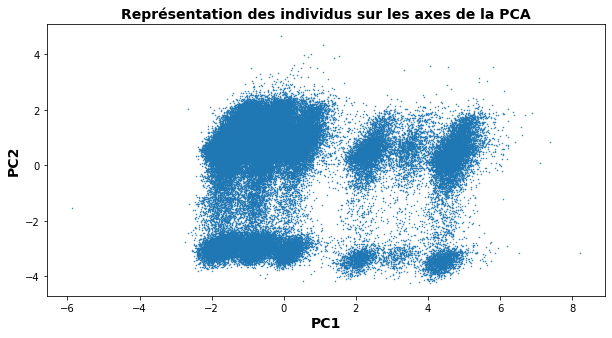

In [260]:
# Représentation des individus sur les PC

# projeter X sur les composantes principales
data_std_projected = pca2.transform(data_std)

# afficher chaque observation
plt.figure(figsize=(10,5))
plt.scatter(data_std_projected[:, 0],
            data_std_projected[:, 1],
            marker='.', s=1)

plt.xlabel('PC1', fontsize=14, fontweight=800)
plt.ylabel('PC2', fontsize=14, fontweight=800)

plt.title('Représentation des individus sur les axes de la PCA',
          fontsize=14, fontweight=800)

Text(0.5, 1.0, 'Contribution des variables aux deux composantes principales')

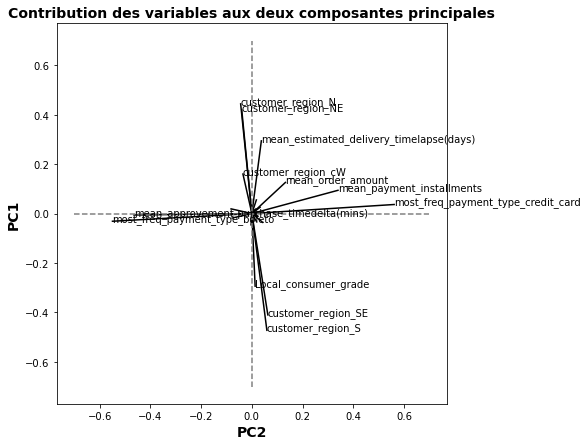

In [87]:
# Représentation de la contribution des variables aux PC

pcs = pca2.components_

plt.figure(figsize=(7,7))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, y], [0, x], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    if abs(x) > 0.1 or abs(y) > 0.1:
        plt.text(y, x, data.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.ylabel('PC1', fontsize=14, fontweight=800)
plt.xlabel('PC2', fontsize=14, fontweight=800)

plt.title('Contribution des variables aux deux composantes principales',
          fontsize=14, fontweight=800)

#### 2.1.1.2. PCA à 3 composantes

In [60]:
# Calcul PCA
pca3 = PCA(n_components=3)
pca3.fit(data_std)
print('La 1ère composante explique environ {}% de la variance observée\
 dans les données, la 2ème environ {}% et la 3ème environ {}%. \n\
 Au total, ces 3 composantes expliquent environ {}% de la variance totale'\
      .format(round(pca3.explained_variance_ratio_[0], 2) * 100,
              round(pca3.explained_variance_ratio_[1], 2) * 100,
              round(pca3.explained_variance_ratio_[2], 2) * 100,
              round(pca3.explained_variance_ratio_.sum(), 2) * 100))

La 1ère composante explique environ 11.0% de la variance observée dans les données, la 2ème environ 8.0% et la 3ème environ 6.0%. 
 Au total, ces 3 composantes expliquent environ 26.0% de la variance totale


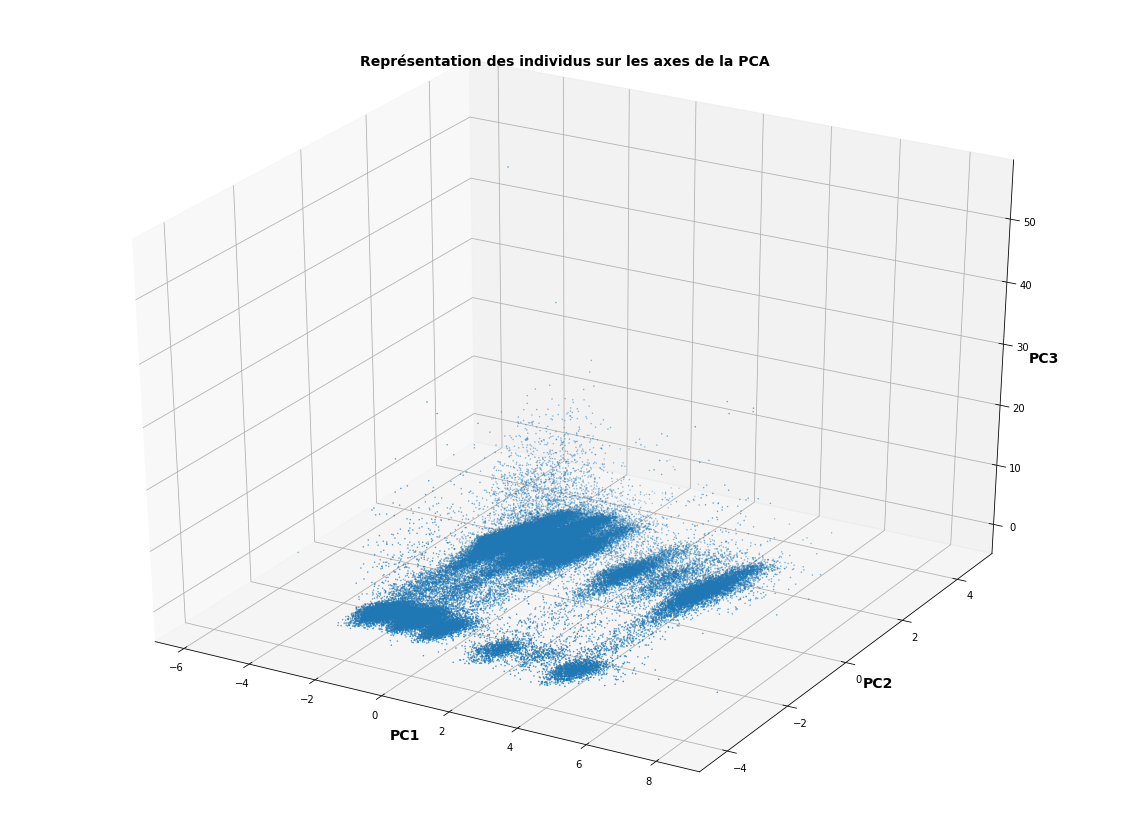

In [261]:
# Représentation des individus sur les PC

# projeter X sur les composantes principales
data_std_projected3 = pca3.transform(data_std)

# afficher chaque observation
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(data_std_projected3[:, 0],
           data_std_projected3[:, 1],
           data_std_projected3[:, 2],
           marker='.', s=1)

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

plt.title('Représentation des individus sur les axes de la PCA',
          fontsize=14, fontweight=800)

plt.show()

In [126]:
# Outlier??
print(np.where(data_std_projected3[:, 2] > 40)[0])

[2340]


In [139]:
# visualisation de ce potentiel outlier
data_std.iloc[2340]
    # ==> correspond à customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455'

mean_payment_sequential                             -0.117680
mean_payment_installments                           -0.578390
nb_product_categ                                    19.075215
last_review_score                                    0.684348
Recency(days)                                       -1.500973
nb_orders                                           74.470153
Frequency(days)                                      2.154938
mean_order_amount                                   -0.867889
mean_nb_items                                       -0.253228
mean_approvement-purchase_timedelta(mins)            0.282622
mean_estimated_delivery_timelapse(days)             -1.119533
Local_consumer_grade                                 0.855476
customer_region_SE                                   0.676957
customer_region_NE                                  -0.324128
customer_region_cW                                  -0.248616
customer_region_S                                    0.455513
customer

In [132]:
# Comparaison vis à vis des autres individus
data_std.describe()
    # ==> peut-être dû à son nb_orders

mean_payment_sequential  mean_payment_installments  nb_product_categ  \
count             9.609600e+04               9.609600e+04      9.609600e+04   
mean             -3.247365e-15              -1.414801e-15     -1.043976e-13   
std               1.000000e+00               1.000000e+00      1.000000e+00   
min              -1.176802e-01              -1.083431e+00     -1.417838e-01   
25%              -1.176802e-01              -7.101396e-01     -1.417838e-01   
50%              -1.176802e-01              -3.368482e-01     -1.417838e-01   
75%              -1.176802e-01               4.097346e-01     -1.417838e-01   
max               7.374009e+01               7.875562e+00      2.548088e+01   

       last_review_score  Recency(days)     nb_orders  Frequency(days)  \
count       9.609600e+04   9.609600e+04  9.609600e+04     9.609600e+04   
mean       -2.983813e-15  -1.195008e-14 -1.093793e-13     3.049866e-14   
std         1.000000e+00   1.000000e+00  1.000000e+00     1.000000e+00   
min        -2.255934e+00  -1.878557e+00 -1.623674e-01    -1.066836e-01   
25%        -5.072275e-02  -8.103155e-01 -1.623674e-01    -1.066836e-01   
50%         6.843478e-01  -1.257424e-01 -1.623674e-01    -1.066836e-01   
75%         6.843478e-01   7.114630e-01 -1.623674e-01    -1.066836e-01   
max         6.843478e-01   3.159001e+00  7.447015e+01     2.524262e+01   

       mean_order_amount  mean_nb_items  \
count       9.609600e+04   9.609600e+04   
mean        6.404346e-14  -2.435363e-14   
std         1.000000e+00   1.000000e+00   
min        -5.883703e+00  -2.644334e-01   
25%        -6.989112e-01  -2.644334e-01   
50%        -4.796679e-02  -2.644334e-01   
75%         5.891526e-01  -2.644334e-01   
max         6.004943e+00   3.783414e+01   

       mean_approvement-purchase_timedelta(mins)  ...  \
count                               9.609600e+04  ...   
mean                               -3.012718e-14  ...   
std                                 1.000000e+00  ...   
min                                -1.965942e+00  ...   
25%                                -7.561401e-01  ...   
50%                                -5.507389e-01  ...   
75%                                 1.142942e+00  ...   
max                                 3.770688e+00  ...   

       most_freq_product_categ_home  most_freq_product_categ_electronics  \
count                  9.609600e+04                         9.609600e+04   
mean                  -1.264539e-15                         6.030564e-16   
std                    1.000000e+00                         1.000000e+00   
min                   -4.523784e-01                        -4.065272e-01   
25%                   -4.523784e-01                        -4.065272e-01   
50%                   -4.523784e-01                        -4.065272e-01   
75%                   -4.523784e-01                        -4.065272e-01   
max                    2.210516e+00                         2.459834e+00   

       most_freq_product_categ_children  most_freq_product_categ_cool_stuff  \
count                      9.609600e+04                        9.609600e+04   
mean                      -8.581180e-16                       -2.278181e-15   
std                        1.000000e+00                        1.000000e+00   
min                       -2.729284e-01                       -1.969972e-01   
25%                       -2.729284e-01                       -1.969972e-01   
50%                       -2.729284e-01                       -1.969972e-01   
75%                       -2.729284e-01                       -1.969972e-01   
max                        3.663927e+00                        5.076162e+00   

       most_freq_product_categ_fashion  \
count                     9.609600e+04   
mean                      1.805093e-15   
std                       1.000000e+00   
min                      -3.179155e-01   
25%                      -3.179155e-01   
50%                      -3.179155e-01   
75%                      -3.179155e

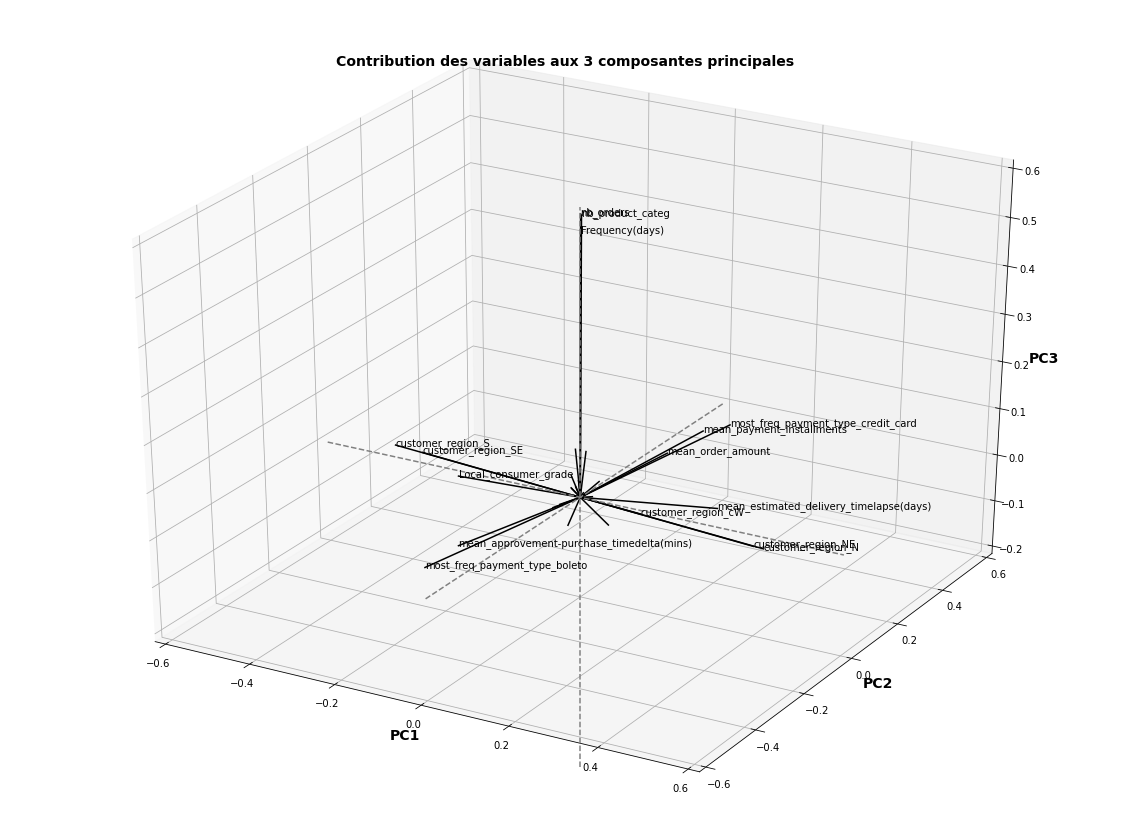

In [398]:
# Représentation de la contribution des variables aux PC

pcs = pca3.components_

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

for i, (x, y, z) in enumerate(zip(pcs[0, :], pcs[1, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y, z)
    ax.plot([0, x], [0, y], [0, z], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    if abs(x) > 0.1 or abs(y) > 0.1 or abs(z) > 0.1:
        ax.text(x, y, z, data.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.6, 0.6], [0, 0], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.6, 0.6], [0, 0], color='grey', ls='--')

# Afficher une ligne z=0
plt.plot([0, 0], [0, 0], [-0.6, 0.6], color='grey', ls='--')

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_zlim(-0.2, 0.6)

plt.title('Contribution des variables aux 3 composantes principales',
          fontsize=14, fontweight=800)

plt.show()

### 2.1.2. t-SNE
#### 2.1.2.1. t-SNE à 2 composantes

In [106]:
tsne2 = TSNE(n_components=2, init='pca')
data_std_TSNEtransf = tsne2.fit_transform(data_std)

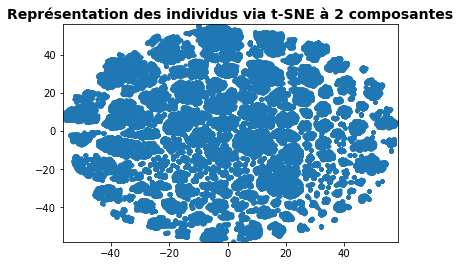

In [108]:
plt.figure()

plt.scatter(data_std_TSNEtransf[:, 0],
            data_std_TSNEtransf[:, 1],
            marker='.')
    
# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(data_std_TSNEtransf[:, 0]),
          np.max(data_std_TSNEtransf[:, 0])])
plt.ylim([np.min(data_std_TSNEtransf[:, 1]),
          np.max(data_std_TSNEtransf[:, 1])])

plt.title('Représentation des individus via t-SNE à 2 composantes',
          fontsize=14, fontweight=800)
plt.show()

#### 2.1.2.2. t-SNE à 3 composantes

In [109]:
tsne3 = TSNE(n_components=3, init='pca')
data_std_TSNEtransf3 = tsne3.fit_transform(data_std)

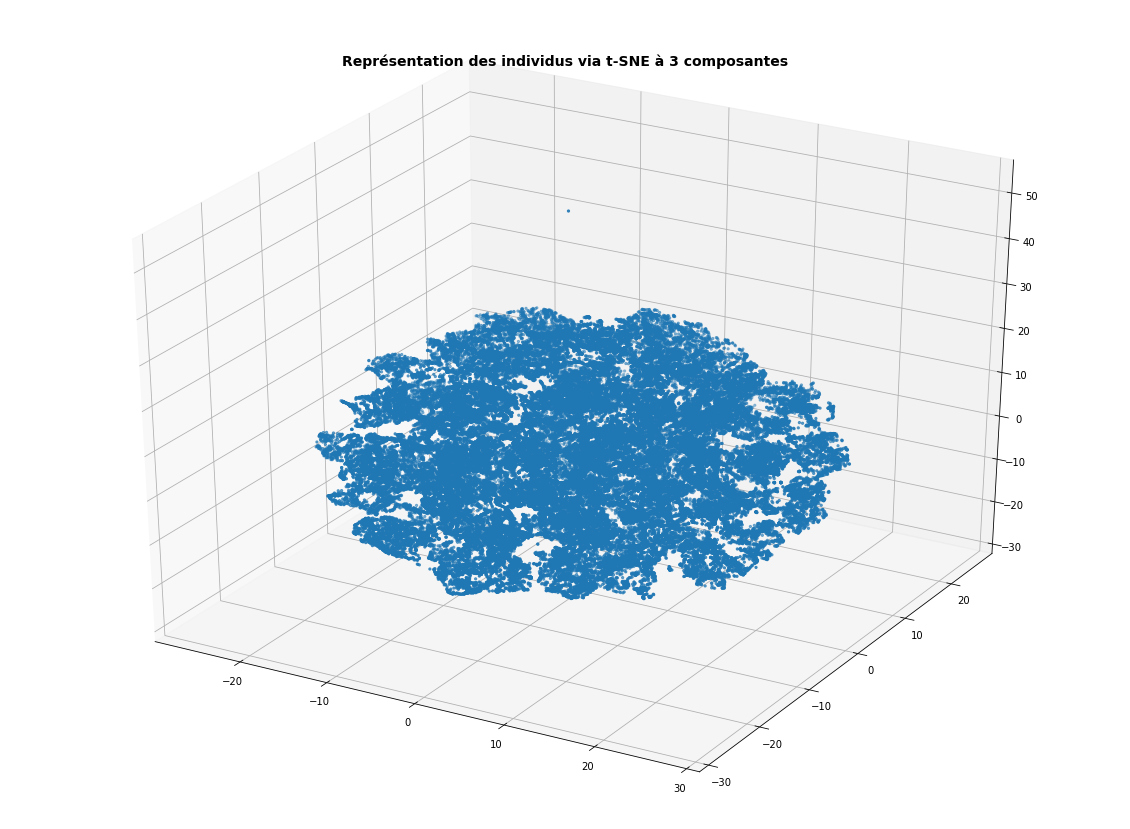

In [110]:
# Représentation des individus via t-SNE à 3 composantes

# afficher chaque observation
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(data_std_TSNEtransf3[:, 0],
           data_std_TSNEtransf3[:, 1],
           data_std_TSNEtransf3[:, 2],
           marker='.')

plt.title('Représentation des individus via t-SNE à 3 composantes',
          fontsize=14, fontweight=800)
plt.show()

In [134]:
# Outlier?
print(np.where(data_std_TSNEtransf3[:, 2] > 30)[0])
    # ==> c'est le même individu

[2340]


## 2.2. Clustering

==> appliqué sur données de base standardisées (data_std)

### 2.2.1 k-means (avec init='k-means++')
#### 2.2.1.1 Recherche du nb optimal de clusters k
**Via le coefficient de silhouette** --> qui varie entre -1 (pire classification) et +1 (meilleure classification)

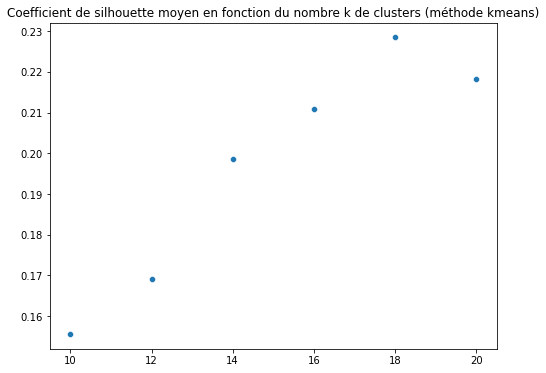

Le coefficient de silhouette est le plus proche de 1 pour 18 clusters, avec une valeur de 0.22843554823837123


In [820]:
# sur range grossier de nb de clusters d'abord...
range_n_clusters = range(10,21,2)

coeff_silh_kmeans_data_std = {}

# Calcul des coefficients de silhouettes moyens en fonction du nb de clusters
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,
                       random_state=10,
                       init='k-means++')
    cluster_labels = clusterer.fit_predict(data_std)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_std, cluster_labels)
    coeff_silh_kmeans_data_std[n_clusters] = silhouette_avg

# Visualisation de l'évolution du coeff de silhouette en fonction du nb de clusters    
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre k de clusters (méthode kmeans)')
sns.scatterplot(x = list(coeff_silh_kmeans_data_std.keys()),
y = list(coeff_silh_kmeans_data_std.values()))
plt.show()

# Nb de clusters optimal et coeff de silhouette associé
print('Le coefficient de silhouette est le plus proche de 1 pour {} clusters, avec une valeur de {}'\
     .format(list(coeff_silh_kmeans_data_std.keys())\
             [list(coeff_silh_kmeans_data_std.values())\
              .index(max(coeff_silh_kmeans_data_std.values()))],
             max(coeff_silh_kmeans_data_std.values())))

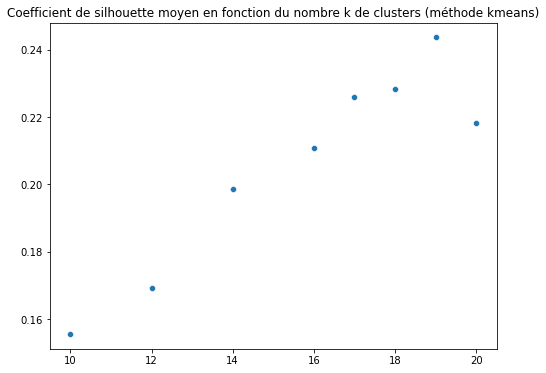

**Bilan:** Le coefficient de silhouette est le plus proche de 1 pour 19 clusters, avec une valeur de 0.24365277606967745


In [821]:
# ... puis sur range affiné autour de la valeur optimale trouvée via range grossier
range_n_clusters = [17, 19]

#coeff_silh_kmeans_data_std = {} # non-réinitialisé

# Calcul des coefficients de silhouettes moyens en fonction du nb de clusters
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, init='k-means++')
    cluster_labels = clusterer.fit_predict(data_std)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_std, cluster_labels)
    coeff_silh_kmeans_data_std[n_clusters] = silhouette_avg

# Visualisation de l'évolution du coeff de silhouette en fonction du nb de clusters    
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre k de clusters (méthode kmeans)')
sns.scatterplot(x = list(coeff_silh_kmeans_data_std.keys()),
y = list(coeff_silh_kmeans_data_std.values()))
plt.show()

# Nb de clusters optimal et coeff de silhouette associé
print('**Bilan:** Le coefficient de silhouette est le plus proche de 1 pour {} clusters, avec une valeur de {}'\
     .format(list(coeff_silh_kmeans_data_std.keys())\
             [list(coeff_silh_kmeans_data_std.values())\
              .index(max(coeff_silh_kmeans_data_std.values()))],
             max(coeff_silh_kmeans_data_std.values())))

**Via indice de Davies-Bouldin** qui varie entre 0 (meilleure classification) et + l'infini (pire classification).

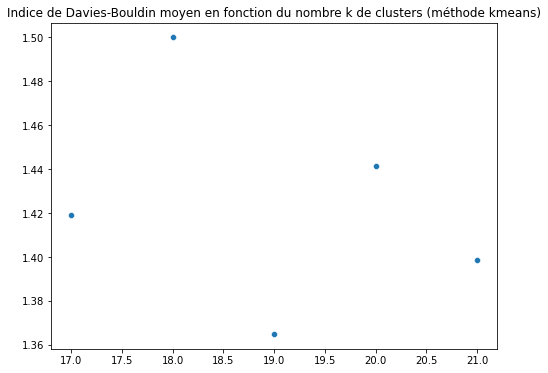

L'indice de Davies-Bouldin est le plus proche de 0pour 19 clusters, avec une valeur de 1.4999621318656948


In [151]:
# sur range affiné 'élargi'
range_n_clusters = [17, 18, 19, 20, 21]

davies_bouldin_kmeans_data_std = {}

# Calcul des coefficients de silhouettes moyens en fonction du nb de clusters
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters,
                       random_state=10,
                       init='k-means++')
    cluster_labels = clusterer.fit_predict(data_std)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    davies_bouldin_avg = davies_bouldin_score(data_std, cluster_labels)
    davies_bouldin_kmeans_data_std[n_clusters] = davies_bouldin_avg

# Visualisation de l'évolution de l'indice de Davies-Bouldin en fonction du nb de clusters    
plt.figure(figsize=(8,6)),
plt.title('Indice de Davies-Bouldin moyen en fonction du nombre k de clusters (méthode kmeans)')
sns.scatterplot(x = list(davies_bouldin_kmeans_data_std.keys()),
y = list(davies_bouldin_kmeans_data_std.values()))
plt.show()

# Nb de clusters optimal et indice de Davies-Bouldin associé
print('L\'indice de Davies-Bouldin est le plus proche de 0\
pour {} clusters, avec une valeur de {}'\
     .format(list(davies_bouldin_kmeans_data_std.keys())\
                 [list(davies_bouldin_kmeans_data_std.values())\
                  .index(min(davies_bouldin_kmeans_data_std.values()))],
             min(davies_bouldin_kmeans_data_std.values())))

#### 2.2.1.2 Visualisation du clustering k-means optimal

In [391]:
# Run du kmeans optimal
optim_kmeans_clusterer = KMeans(n_clusters=19, random_state=10, init='k-means++')
optim_kmeans_cluster_labels = optim_kmeans_clusterer.fit_predict(data_std)

In [392]:
# colors to use for each cluster
colors_sns = {}
for i in range (0,20,1):
    colors_sns[i] = cm.nipy_spectral(i / 19)
    
colors_plt = cm.nipy_spectral(optim_kmeans_cluster_labels.astype(float) / 19)

Text(0.5, 1.0, 'Représentation des 19 clusters (k-means) sur les axes de la PCA')

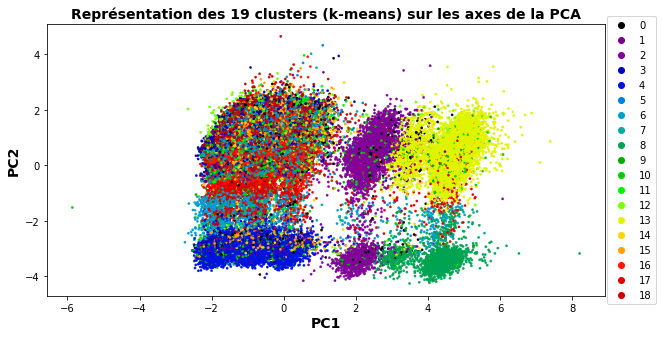

In [433]:
# Représentation sur PCA à 2 PC
plt.figure(figsize=(10,5))

sns.scatterplot(x=data_std_projected[:, 0],
                y=data_std_projected[:, 1],
                marker='.', edgecolor=None,
                hue=optim_kmeans_clusterer.labels_,
                legend='full',
                palette=colors_sns, s=20)

plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.xlabel('PC1', fontsize=14, fontweight=800)
plt.ylabel('PC2', fontsize=14, fontweight=800)

plt.title('Représentation des 19 clusters (k-means) sur les axes de la PCA',
          fontsize=14, fontweight=800)

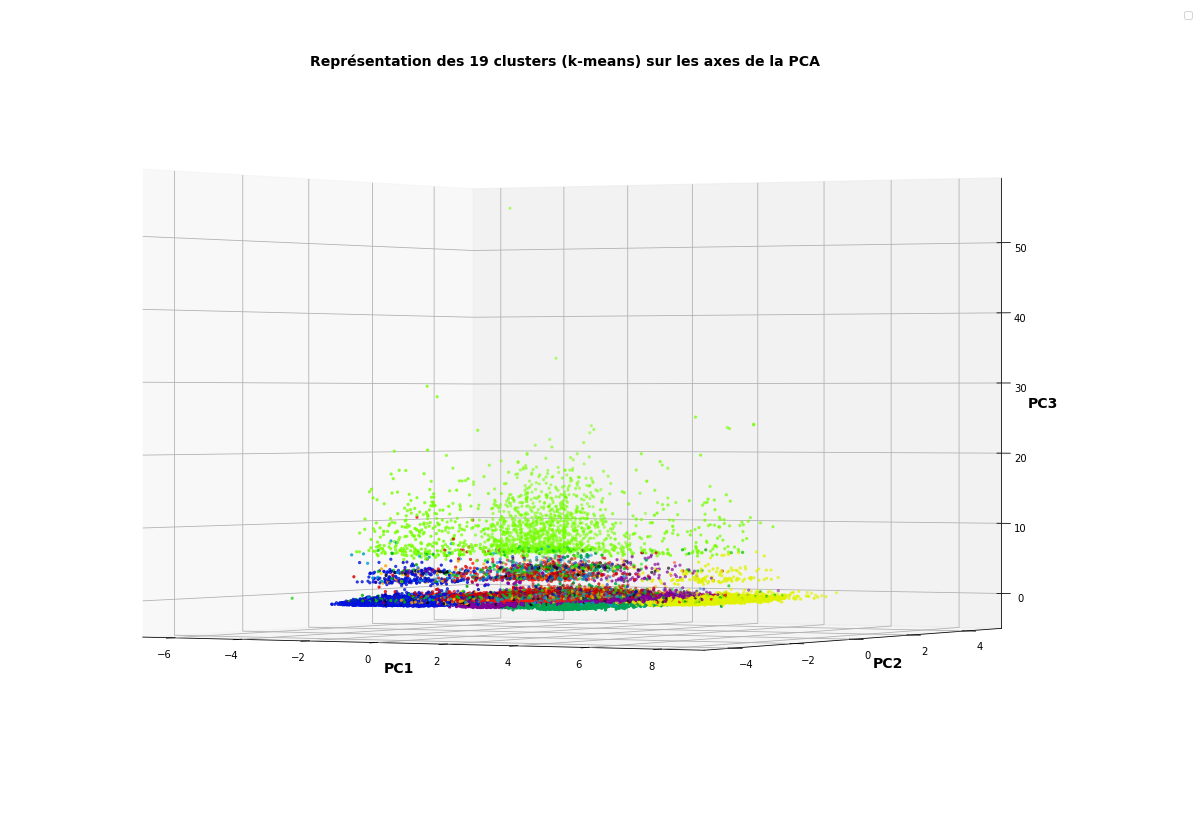

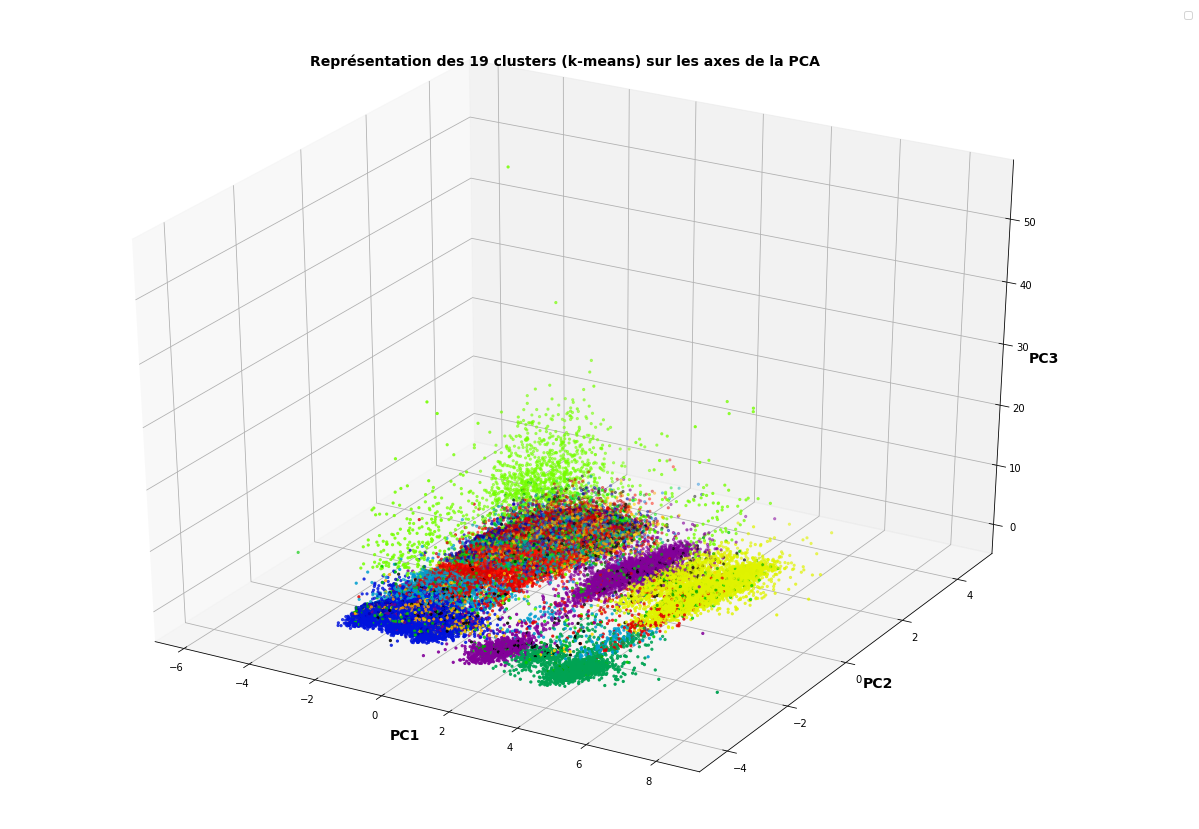

In [416]:
# Représentation sur PCA à 3 PC

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=0, azim=300)

sc = ax.scatter(data_std_projected3[:, 0],
                data_std_projected3[:, 1],
                data_std_projected3[:, 2],
                marker='.', c=colors_plt)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

plt.title('Représentation des 19 clusters (k-means) sur les axes de la PCA',
          fontsize=14, fontweight=800)

plt.show()

####################""""""
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=30, azim=300)

sc = ax.scatter(data_std_projected3[:, 0],
                data_std_projected3[:, 1],
                data_std_projected3[:, 2],
                marker='.', c=colors_plt)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

plt.title('Représentation des 19 clusters (k-means) sur les axes de la PCA',
          fontsize=14, fontweight=800)

plt.show()

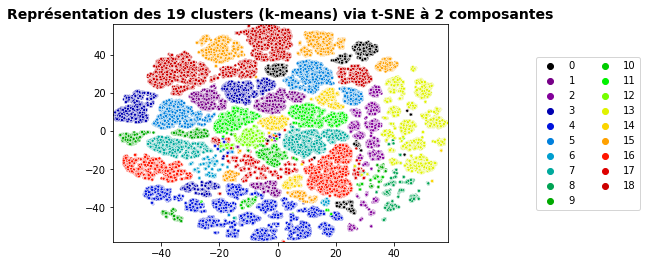

In [395]:
# Représentation sur t-SNE à 2 composantes
plt.figure()

sns.scatterplot(x=data_std_TSNEtransf[:, 0],
                y=data_std_TSNEtransf[:, 1],
                marker='.',
                hue=optim_kmeans_clusterer.labels_,
                legend='full',
                palette=colors_sns)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=2)
    
# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(data_std_TSNEtransf[:, 0]),
          np.max(data_std_TSNEtransf[:, 0])])
plt.ylim([np.min(data_std_TSNEtransf[:, 1]),
          np.max(data_std_TSNEtransf[:, 1])])

plt.title('Représentation des 19 clusters (k-means) via t-SNE à 2 composantes',
          fontsize=14, fontweight=800)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\matplotlib\collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


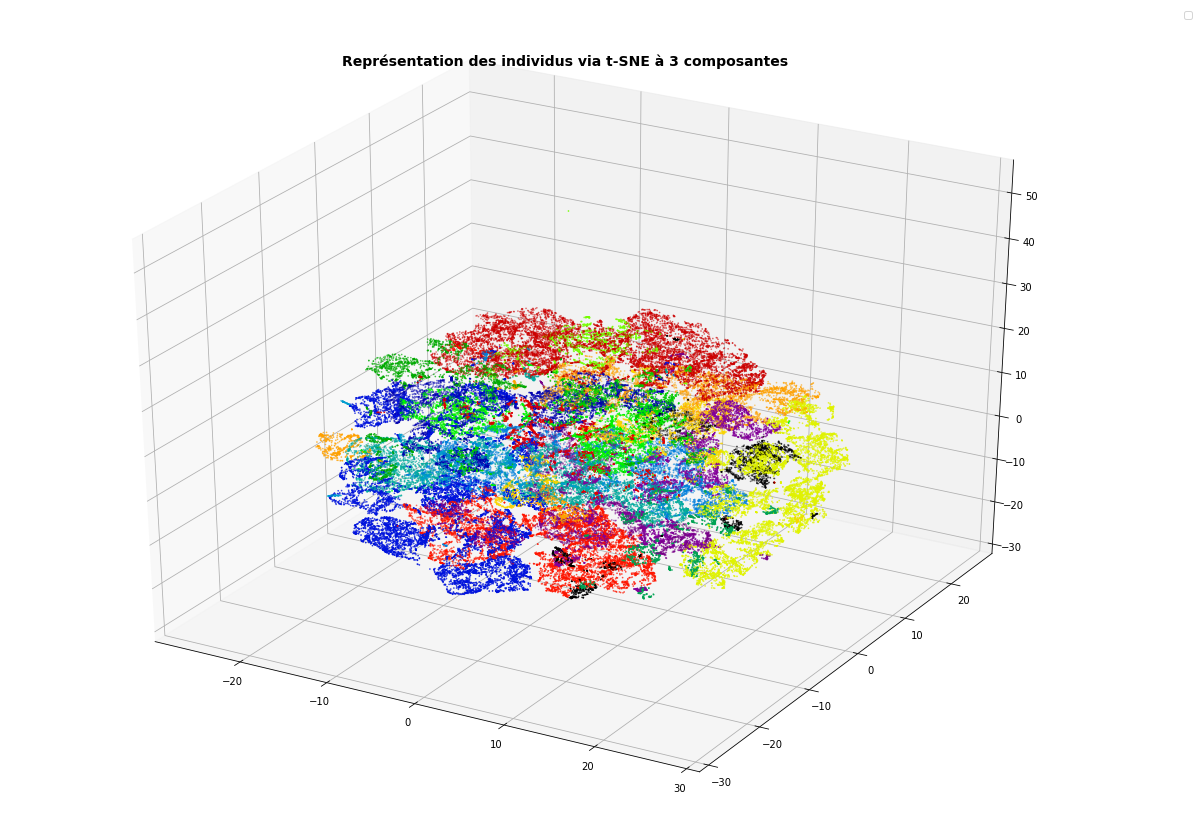

In [396]:
# Représentation via t-SNE à 3 composantes
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 19).as_hex())

# plot
sc = ax.scatter(data_std_TSNEtransf3[:, 0],
                data_std_TSNEtransf3[:, 1],
                data_std_TSNEtransf3[:, 2],
                marker='.', s=2, c=colors_plt)

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.title('Représentation des 19 clusters (kmeans) via t-SNE à 3 composantes',
          fontsize=14, fontweight=800)

plt.show()

### 2.2.2 DBSCAN ==> bilan = non adapté, nombre de cluster reste élevé même en jouant sur hyperparamètres
* 1er essai - produit 550 clusters, écarté

In [337]:
dbscan_clusterer = DBSCAN(eps = 1, min_samples=5)
dbscan_cluster_labels = dbscan_clusterer.fit_predict(data_std)
# gives 550 clusters = NOT USED

* 2eme essai - produit 227 clusters, visualisé mais non montré ici

In [339]:
dbscan_clusterer = DBSCAN(eps=3, min_samples=5)
dbscan_cluster_labels = dbscan_clusterer.fit_predict(data_std)
# gives 227 clusters = USED even if that's a lot

* 3eme essai - memory error

In [ ]:
#dbscan_clusterer3 = DBSCAN(eps = 10, min_samples=5)
#dbscan_cluster_labels = dbscan_clusterer.fit_predict(data_std)

# MEMORY ERROR = NOT USED

* 4eme essai - produit 42 clusters, visualisé mais non montré ici

In [344]:
dbscan_clusterer4 = DBSCAN(eps=5, min_samples=5)
dbscan_cluster_labels4 = dbscan_clusterer4.fit_predict(data_std)
np.unique(dbscan_cluster_labels4)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40], dtype=int64)

* 5eme essai - produit 36 clusters, visualisé

In [354]:
dbscan_clusterer5 = DBSCAN(eps=5, min_samples=10)
dbscan_cluster_labels5 = dbscan_clusterer5.fit_predict(data_std)
np.unique(dbscan_cluster_labels5)

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34], dtype=int64)

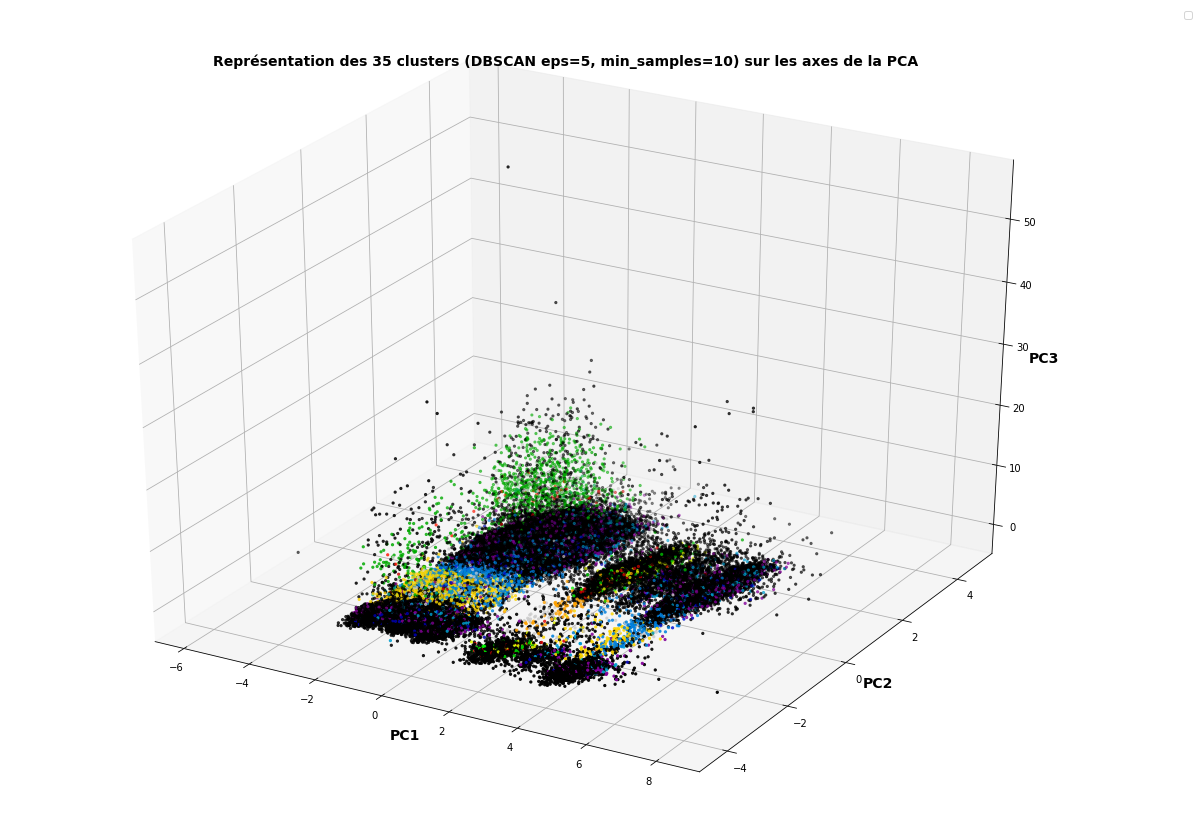

In [369]:
# Représentation sur PCA à 3 PC

colors_plt = cm.nipy_spectral(dbscan_cluster_labels5.astype(float) / 19)

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

sc = ax.scatter(data_std_projected3[:, 0],
                data_std_projected3[:, 1],
                data_std_projected3[:, 2],
                marker='.', c=colors_plt)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

plt.title('Représentation des 35 clusters (DBSCAN eps=5, min_samples=10) sur les axes de la PCA',
          fontsize=14, fontweight=800)

plt.show()

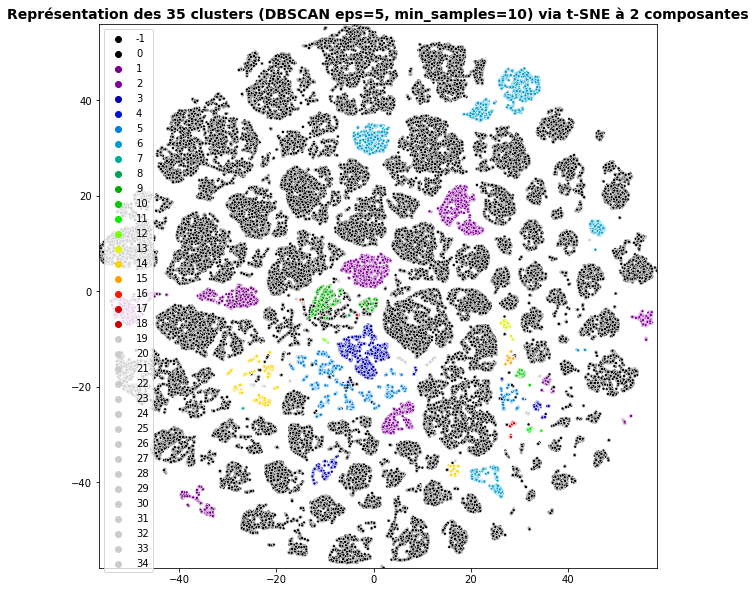

In [370]:
# Représentation sur t-SNE à 2 composantes
colors_sns = {}
for i in range (-1,35,1):
    colors_sns[i] = cm.nipy_spectral(i / 19)

plt.figure(figsize=(10,10))

sns.scatterplot(x=data_std_TSNEtransf[:, 0],
                y=data_std_TSNEtransf[:, 1],
                marker='.',
                hue=dbscan_cluster_labels5,
                legend='full',
                palette=colors_sns)
    
# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(data_std_TSNEtransf[:, 0]),
          np.max(data_std_TSNEtransf[:, 0])])
plt.ylim([np.min(data_std_TSNEtransf[:, 1]),
          np.max(data_std_TSNEtransf[:, 1])])

plt.title('Représentation des 35 clusters (DBSCAN eps=5, min_samples=10) via t-SNE à 2 composantes',
          fontsize=14, fontweight=800)
plt.show()

### 2.2.3 Clustering hierarchique

In [1]:
hierarch_clusterer = AgglomerativeClustering(n_clusters=19)
hierarch_cluster_labels = hierarch_clusterer.fit_predict(data_std)
np.unique(hierarch_cluster_labels)
    # MEMORY ERROR: non adapté aux échentillons avec de nbx individus

## 2.3 Interprétation des clusters obtenus via k-means:
k-means = clustering sélectionné comme le plus performant
### 2.3.1 Plot des centroïdes sur graphe des contributions des variables aux PC

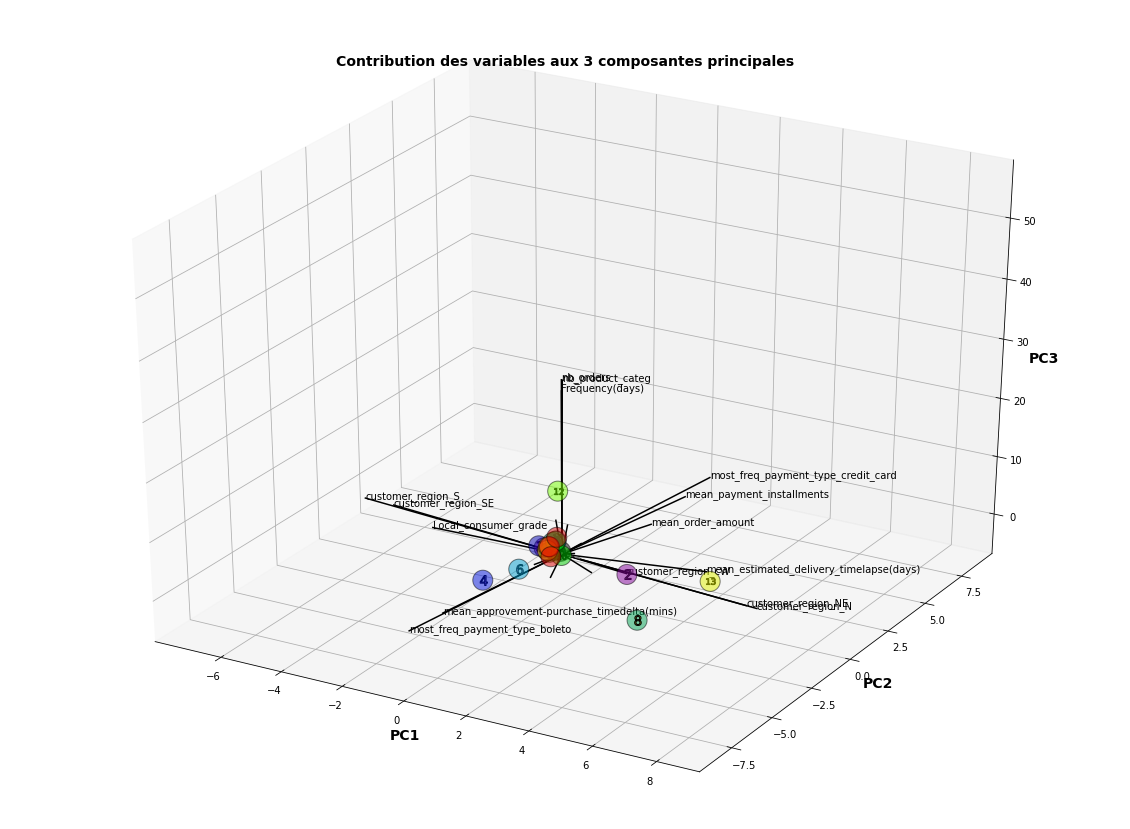

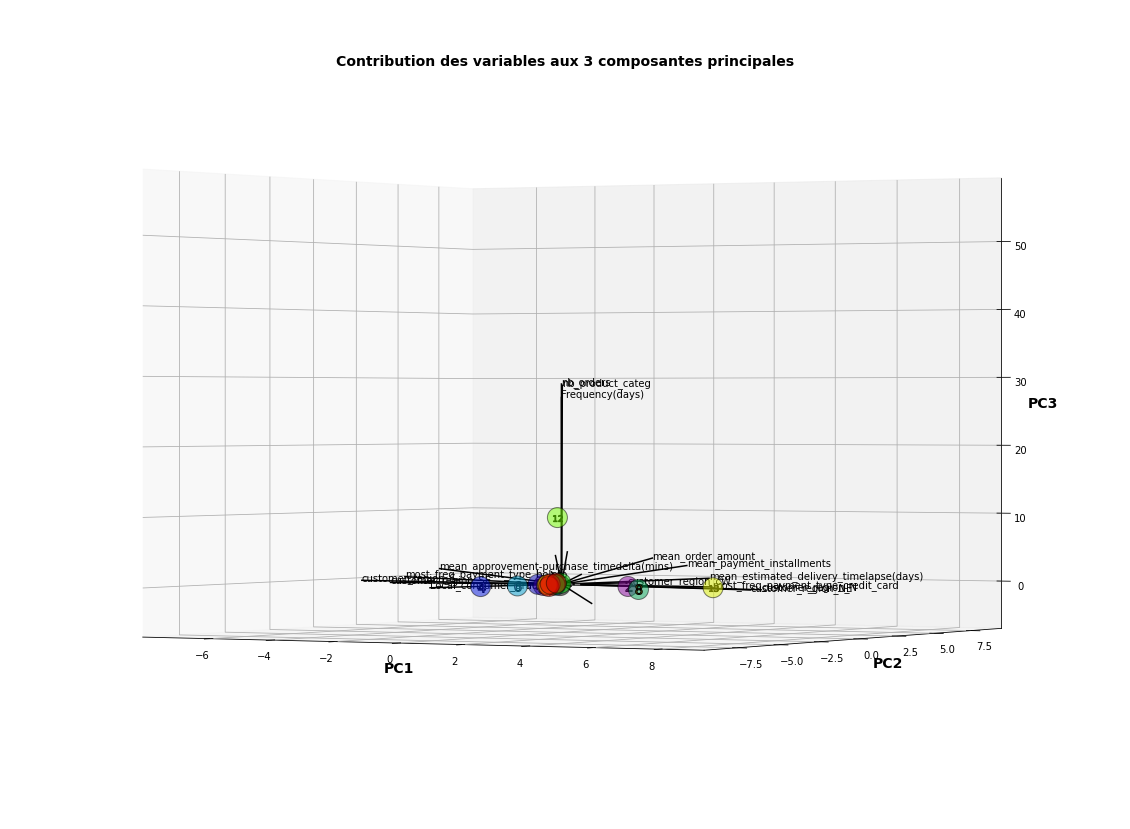

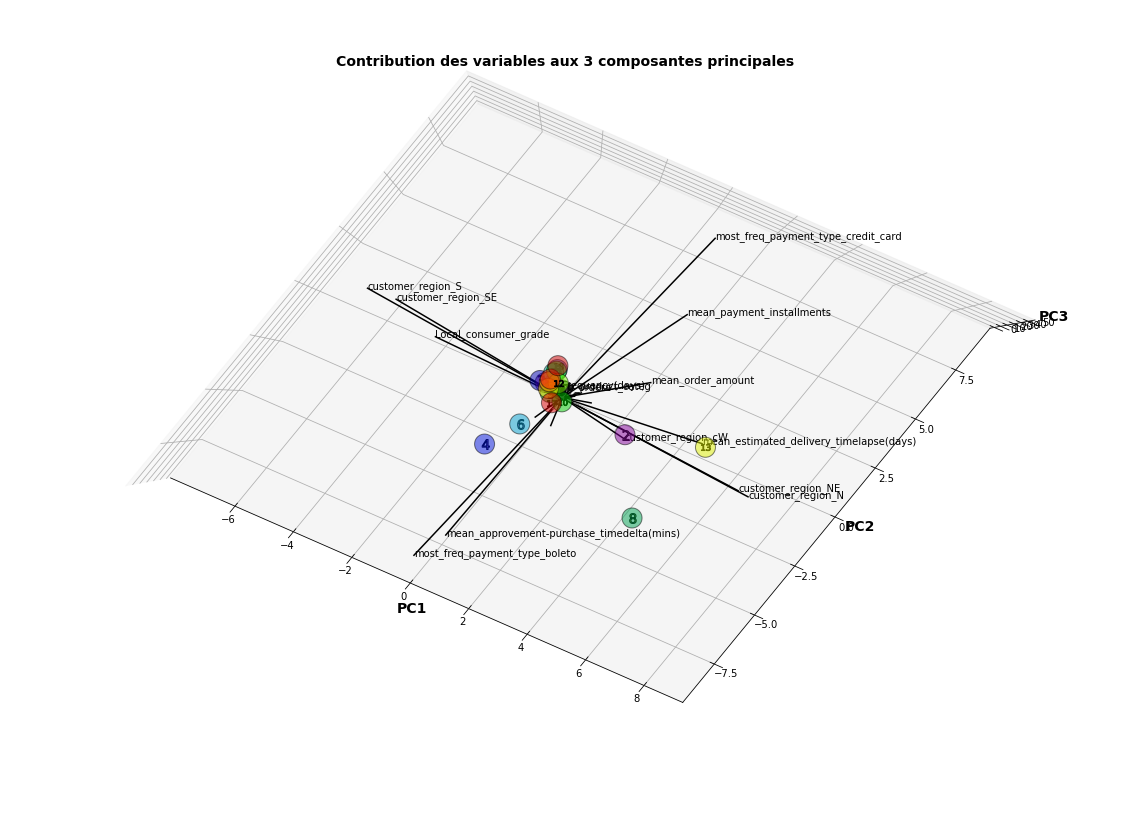

In [467]:
# Représentation de la contribution des variables aux PC

pcs = pca3.components_

# couleurs
colors_plt = cm.nipy_spectral(optim_kmeans_cluster_labels.astype(float) / 19)
centers_labels = np.array(range(0,19,1))
colors_plt2 = cm.nipy_spectral(centers_labels.astype(float) / 19)


########### PLOT 1 #############

# plot base figure
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=30, azim=300)

# Afficher les vecteurs de contribution des variables
for i, (x, y, z) in enumerate(zip(pcs[0, :], pcs[1, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y, z)
    ax.plot([0, x*15], [0, y*15], [0, z*50], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    if abs(x) > 0.1 or abs(y) > 0.1 or abs(z) > 0.1:
        ax.text(x*15, y*15, z*50, data.columns[i], fontsize='10')

# Afficher une ligne y=0, une ligne x=0 et une ligne z=0
plt.plot([-0.6, 0.6], [0, 0], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.6, 0.6], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [0, 0], [-0.6, 0.6], color='grey', ls='--')

# Afficher les individus
ax.scatter(data_std_projected3[:, 0],
           data_std_projected3[:, 1],
           data_std_projected3[:, 2],
           marker='.', c=colors_plt, alpha=0)

# Afficher les centroïdes de chaque cluster k-means
    # calcul des coordonnées des centroïdes sur les 3 1ers PC 
centers = optim_kmeans_clusterer.cluster_centers_
centers_projected3 = pca3.transform(centers)
    # ajout des centroïdes
ax.scatter(centers_projected3[:, 0],
           centers_projected3[:, 1],
           centers_projected3[:, 2],
           marker='o',
           c=colors_plt2, alpha=0.5,
           s=400, edgecolor='k')
for i, c in enumerate(centers_projected3):
    ax.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)


plt.title('Contribution des variables aux 3 composantes principales et clusters (19, k-means)',
          fontsize=14, fontweight=800)

plt.show()


########### PLOT 2 #############

# plot base figure
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=0, azim=300)

# Afficher les vecteurs de contribution des variables
for i, (x, y, z) in enumerate(zip(pcs[0, :], pcs[1, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y, z)
    ax.plot([0, x*15], [0, y*15], [0, z*50], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    if abs(x) > 0.1 or abs(y) > 0.1 or abs(z) > 0.1:
        ax.text(x*15, y*15, z*50, data.columns[i], fontsize='10')

# Afficher une ligne y=0, une ligne x=0 et une ligne z=0
plt.plot([-0.6, 0.6], [0, 0], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.6, 0.6], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [0, 0], [-0.6, 0.6], color='grey', ls='--')

# Afficher les individus
ax.scatter(data_std_projected3[:, 0],
           data_std_projected3[:, 1],
           data_std_projected3[:, 2],
           marker='.', c=colors_plt, alpha=0)

# Afficher les centroïdes de chaque cluster k-means
    # calcul des coordonnées des centroïdes sur les 3 1ers PC 
centers = optim_kmeans_clusterer.cluster_centers_
centers_projected3 = pca3.transform(centers)
    # ajout des centroïdes
ax.scatter(centers_projected3[:, 0],
           centers_projected3[:, 1],
           centers_projected3[:, 2],
           marker='o',
           c=colors_plt2, alpha=0.5,
           s=400, edgecolor='k')
for i, c in enumerate(centers_projected3):
    ax.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)


plt.title('Contribution des variables aux 3 composantes principales et clusters (19, k-means)',
          fontsize=14, fontweight=800)

plt.show()



########### PLOT 3 #############

# plot base figure
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=90, azim=300)

# Afficher les vecteurs de contribution des variables
for i, (x, y, z) in enumerate(zip(pcs[0, :], pcs[1, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y, z)
    ax.plot([0, x*15], [0, y*15], [0, z*50], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    if abs(x) > 0.1 or abs(y) > 0.1 or abs(z) > 0.1:
        ax.text(x*15, y*15, z*50, data.columns[i], fontsize='10')

# Afficher une ligne y=0, une ligne x=0 et une ligne z=0
plt.plot([-0.6, 0.6], [0, 0], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.6, 0.6], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [0, 0], [-0.6, 0.6], color='grey', ls='--')

# Afficher les individus
ax.scatter(data_std_projected3[:, 0],
           data_std_projected3[:, 1],
           data_std_projected3[:, 2],
           marker='.', c=colors_plt, alpha=0)

# Afficher les centroïdes de chaque cluster k-means
    # calcul des coordonnées des centroïdes sur les 3 1ers PC 
centers = optim_kmeans_clusterer.cluster_centers_
centers_projected3 = pca3.transform(centers)
    # ajout des centroïdes
ax.scatter(centers_projected3[:, 0],
           centers_projected3[:, 1],
           centers_projected3[:, 2],
           marker='o',
           c=colors_plt2, alpha=0.5,
           s=400, edgecolor='k')
for i, c in enumerate(centers_projected3):
    ax.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)


plt.title('Contribution des variables aux 3 composantes principales et clusters (19, k-means)',
          fontsize=14, fontweight=800)

plt.show()

### 2.3.2 Statistiques de chaque variable pour chaque cluster

In [490]:
data_w_cluster = data.copy()
data_w_cluster['cluster'] = optim_kmeans_cluster_labels

cluster_stat = data_w_cluster.groupby('cluster')['mean_payment_sequential'].size().to_frame()
cluster_stat.rename(columns={'mean_payment_sequential':'size'}, inplace=True)

for feature, aggfunc in [['mean_payment_sequential', pd.Series.mean],
                         ['mean_payment_installments', pd.Series.mean],
                         ['nb_product_categ',pd.Series.mean],
                         ['last_review_score',pd.Series.mean],
                         ['Recency(days)',pd.Series.mean],
                         ['nb_orders',pd.Series.mean],
                         ['Frequency(days)',pd.Series.mean],
                         ['mean_order_amount',pd.Series.mean],
                         ['mean_nb_items',pd.Series.mean],
                         ['mean_approvement-purchase_timedelta(mins)',pd.Series.mean],
                         ['mean_estimated_delivery_timelapse(days)',pd.Series.mean],
                         ['Local_consumer_grade',pd.Series.mean],
                         ['customer_region_SE',pd.Series.sum],
                         ['customer_region_NE',pd.Series.sum],
                         ['customer_region_cW',pd.Series.sum],
                         ['customer_region_S',pd.Series.sum],
                         ['customer_region_N',pd.Series.sum],
                         ['most_freq_product_categ_appliances/housewares',pd.Series.sum],
                         ['most_freq_product_categ_health/beauty',pd.Series.sum],
                         ['most_freq_product_categ_auto/garden/construction',pd.Series.sum],
                         ['most_freq_product_categ_daily_life_products',pd.Series.sum],
                         ['most_freq_product_categ_office/commerce',pd.Series.sum],
                         ['most_freq_product_categ_unknown/other',pd.Series.sum],
                         ['most_freq_product_categ_home',pd.Series.sum],
                         ['most_freq_product_categ_electronics',pd.Series.sum],
                         ['most_freq_product_categ_children',pd.Series.sum],
                         ['most_freq_product_categ_cool_stuff',pd.Series.sum],
                         ['most_freq_product_categ_fashion',pd.Series.sum],
                         ['most_freq_product_categ_leisure/culture',pd.Series.sum],
                         ['most_freq_payment_type_credit_card',pd.Series.sum],
                         ['most_freq_payment_type_voucher',pd.Series.sum],
                         ['most_freq_payment_type_boleto',pd.Series.sum],
                         ['most_freq_payment_type_debit_card',pd.Series.sum]]:
    cluster_stat_to_add = data_w_cluster.groupby('cluster')[feature].agg(aggfunc).to_frame()
    cluster_stat = pd.merge(cluster_stat, cluster_stat_to_add, left_index=True, right_index=True, how='left')

In [500]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')
s1 = cluster_stat.style.apply(highlight_max, props='color:white;background-color:darkred', axis=0)
s2 = s1.apply(highlight_min, props='color:white;background-color:darkblue', axis=0)
s2

**Bilan:**
- **on peut identifier des clusters intéressants du point de vue de la problématique(e.g. cluster 12 = clients commandant beaucoup d'articles et souvent, cluster 13 = clients passant des commandes à montant élevé)**
- **mais aussi des clusters moins intéressants (i.e. clusters liés uniquement à la région des clients ou à la cétgorie de produit la plus fréquemment achetée, mais aussi clusters sans grand intérêt à première vue e.g. cluster 6 = clients récents payant par debit card)**
- **de plus, il y a tout un groupe de clusters non distincts, et un nb assez élevé de clusters (19)**

# 3. Clustering -- 2eme essai dataset restreint en termes de features + outlier supprimé
- clusterer = k-means (++)
- 1er clustering: sur data_std restreint aux données != "customer_region_XX" et "most_freq_product_categ_XX"

SI BESOIN (NON REALISE ICI):
- 2ème "clustering" pour avoir des sortes de 'sous-clusters' / pour un ciblage + ciblé: sur "most_freq_product_categ_XX" (algo de clustering non nécessaire, un simple groupby suffit)
- 3ème "clustering" = idem mais avec "customer_region_XX" --> à prendre en compte si local_consumer_grade > some value

In [521]:
# restriction du df en entrées aux features d'intérêt
data_std_restricted = data_std[['mean_payment_sequential', 'mean_payment_installments',
       'nb_product_categ', 'last_review_score', 'Recency(days)', 'nb_orders',
       'Frequency(days)', 'mean_order_amount', 'mean_nb_items',
       'mean_approvement-purchase_timedelta(mins)',
       'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']]

In [522]:
# suppression de l'outlier
data_std_restricted = data_std_restricted.drop('8d50f5eadf50201ccdcedfb9e2ac8455')

## 3.1. PCA

### 3.1.1. PCA à 2 composantes

In [523]:
# Calcul PCA
pca2 = PCA(n_components=2)
pca2.fit(data_std_restricted)
print('La première composante explique environ {}% de la variance observée\
 dans les données et la deuxième environ {}%. \nAu total, ces deux\
 composantes expliquent environ {}% de la variance totale'\
      .format(round(pca2.explained_variance_ratio_[0], 2) * 100,
              round(pca2.explained_variance_ratio_[1], 2) * 100,
              round(pca2.explained_variance_ratio_.sum(), 2) * 100))

La première composante explique environ 18.0% de la variance observée dans les données et la deuxième environ 15.0%. 
Au total, ces deux composantes expliquent environ 33.0% de la variance totale


Text(0.5, 1.0, 'Représentation des individus sur les axes de la PCA')

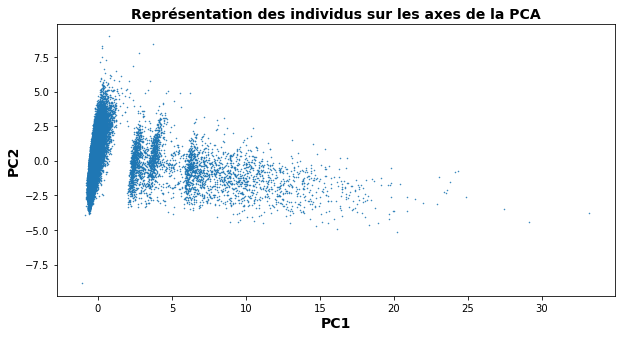

In [524]:
# Représentation des individus sur les PC

# projeter X sur les composantes principales
data_std_restricted_projected = pca2.transform(data_std_restricted)

# afficher chaque observation
plt.figure(figsize=(10,5))
plt.scatter(data_std_restricted_projected[:, 0],
            data_std_restricted_projected[:, 1],
            marker='.', s=1)

plt.xlabel('PC1', fontsize=14, fontweight=800)
plt.ylabel('PC2', fontsize=14, fontweight=800)

plt.title('Représentation des individus sur les axes de la PCA', fontsize=14, fontweight=800)

Text(0.5, 1.0, 'Contribution des variables aux deux composantes principales')

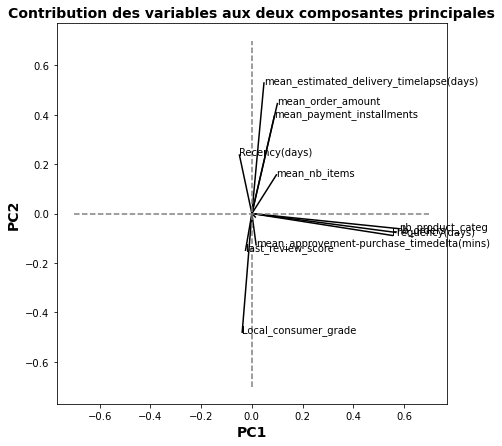

In [527]:
# Représentation de la contribution des variables aux PC

pcs = pca2.components_

plt.figure(figsize=(7,7))

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    if abs(x) > 0.1 or abs(y) > 0.1:
        plt.text(x, y, data_std_restricted.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.7, 0.7], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.7, 0.7], color='grey', ls='--')

plt.xlabel('PC1', fontsize=14, fontweight=800)
plt.ylabel('PC2', fontsize=14, fontweight=800)

plt.title('Contribution des variables aux deux composantes principales',
          fontsize=14, fontweight=800)

### 3.1.2. PCA à 3 composantes

In [528]:
# Calcul PCA
pca3 = PCA(n_components=3)
pca3.fit(data_std_restricted)
print('La 1ère composante explique environ {}% de la variance observée\
 dans les données, la 2ème environ {}% et la 3ème environ {}%. \n\
 Au total, ces 3 composantes expliquent environ {}% de la variance totale'\
      .format(round(pca3.explained_variance_ratio_[0], 2) * 100,
              round(pca3.explained_variance_ratio_[1], 2) * 100,
              round(pca3.explained_variance_ratio_[2], 2) * 100,
              round(pca3.explained_variance_ratio_.sum(), 2) * 100))

La 1ère composante explique environ 18.0% de la variance observée dans les données, la 2ème environ 15.0% et la 3ème environ 11.0%. 
 Au total, ces 3 composantes expliquent environ 44.0% de la variance totale


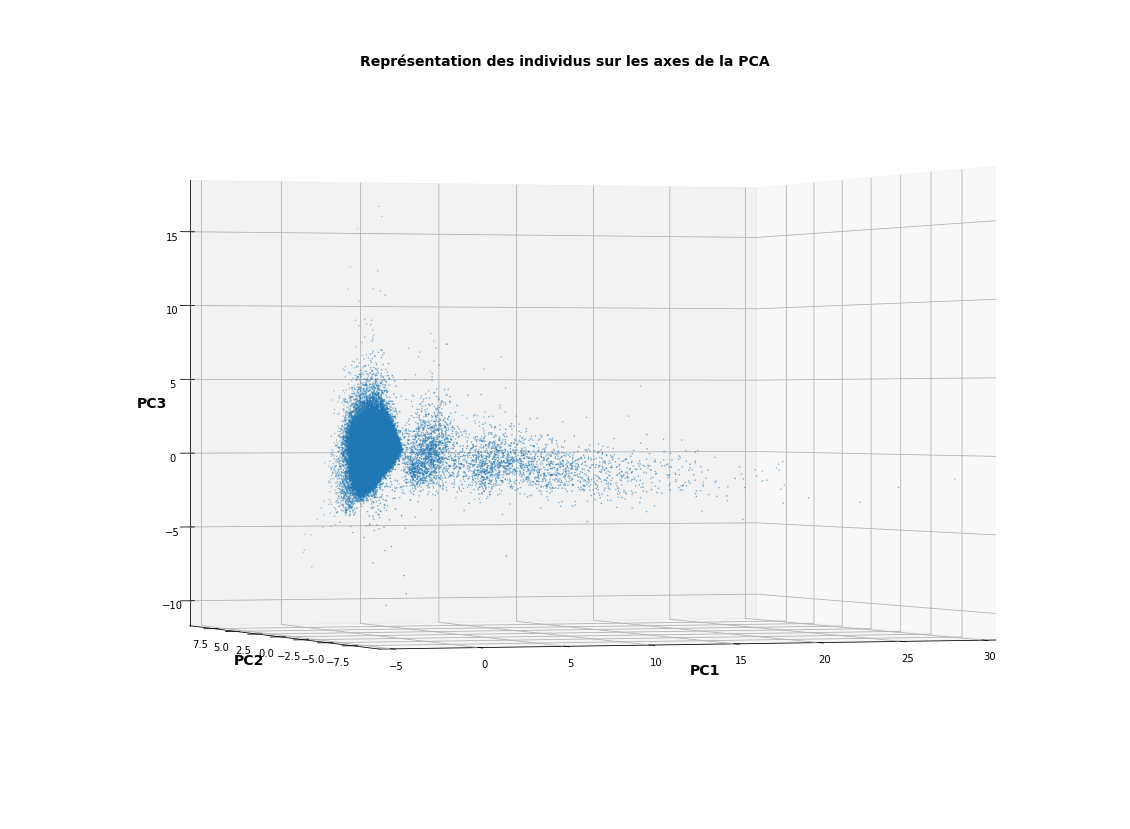

In [529]:
# Représentation des individus sur les PC

# projeter X sur les composantes principales
data_std_restricted_projected3 = pca3.transform(data_std_restricted)

# afficher chaque observation
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=0, azim=250)

ax.scatter(data_std_restricted_projected3[:, 0],
           data_std_restricted_projected3[:, 1],
           data_std_restricted_projected3[:, 2],
           marker='.', s=1)

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

ax.set_xlim(-5,30)
#ax.set_ylim()
#ax.set_zlim()

plt.title('Représentation des individus sur les axes de la PCA',
          fontsize=14, fontweight=800)

plt.show()

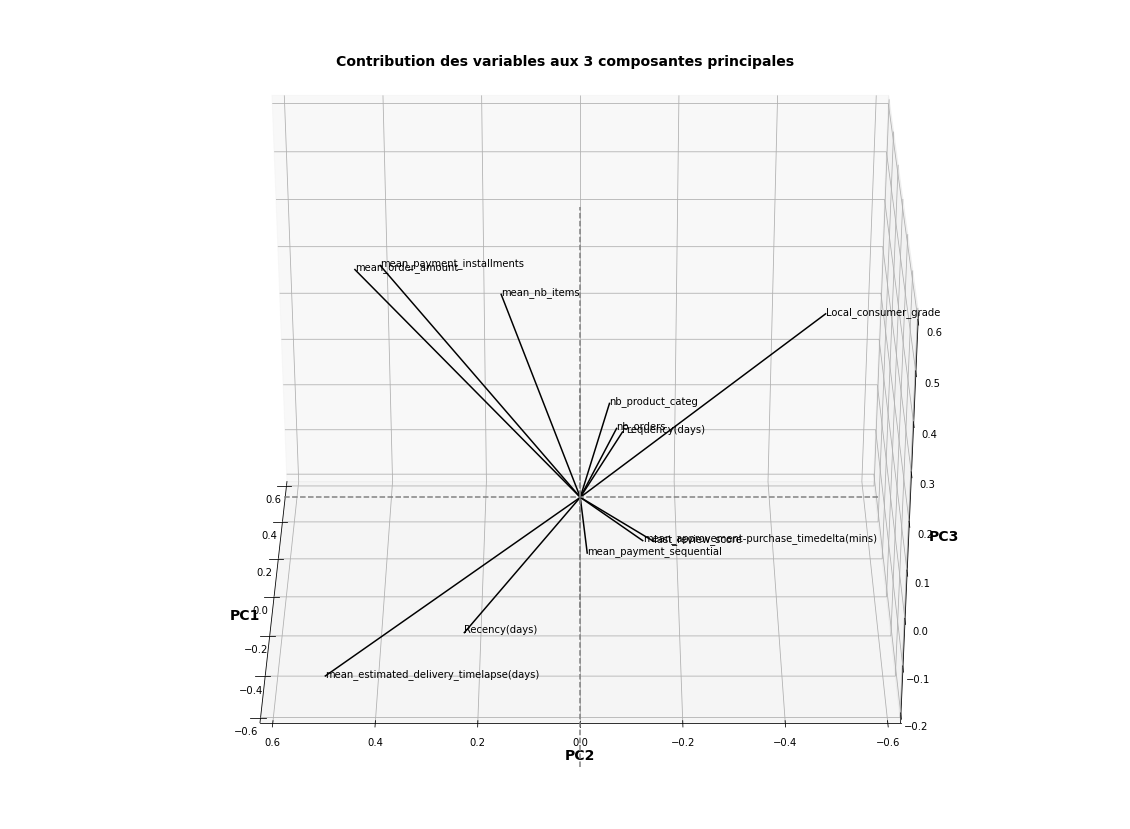

In [595]:
# Représentation de la contribution des variables aux PC

pcs = pca3.components_

fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=30, azim=180)

for i, (x, y, z) in enumerate(zip(pcs[0, :], pcs[1, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y, z)
    ax.plot([0, x], [0, y], [0, z], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    if abs(x) > 0.1 or abs(y) > 0.1 or abs(z) > 0.1:
        ax.text(x, y, z, data_std_restricted.columns[i], fontsize='10')

# Afficher une ligne horizontale y=0
plt.plot([-0.6, 0.6], [0, 0], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.6, 0.6], [0, 0], color='grey', ls='--')

# Afficher une ligne z=0
plt.plot([0, 0], [0, 0], [-0.6, 0.6], color='grey', ls='--')

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

ax.set_xlim(-0.6, 0.6)
ax.set_ylim(-0.6, 0.6)
ax.set_zlim(-0.2, 0.6)

plt.title('Contribution des variables aux 3 composantes principales',
          fontsize=14, fontweight=800)

plt.show()

## 3.2. t-SNE
### 3.2.1. t-SNE à 2 composantes

In [536]:
tsne2 = TSNE(n_components=2, init='pca')
data_std_restricted_TSNEtransf = tsne2.fit_transform(data_std_restricted)

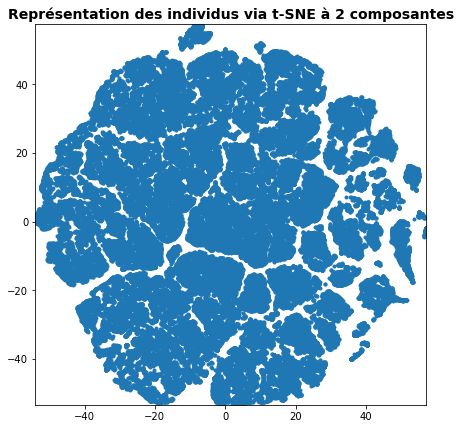

In [538]:
plt.figure(figsize=(7,7))

plt.scatter(data_std_restricted_TSNEtransf[:, 0],
            data_std_restricted_TSNEtransf[:, 1], marker='.')
    
# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(data_std_restricted_TSNEtransf[:, 0]),
          np.max(data_std_restricted_TSNEtransf[:, 0])])
plt.ylim([np.min(data_std_restricted_TSNEtransf[:, 1]),
          np.max(data_std_restricted_TSNEtransf[:, 1])])

plt.title('Représentation des individus via t-SNE à 2 composantes',
          fontsize=14, fontweight=800)
plt.show()

### 3.2.2. t-SNE à 3 composantes

In [539]:
tsne3 = TSNE(n_components=3, init='pca')
data_std_restricted_TSNEtransf3 = tsne3.fit_transform(data_std_restricted)

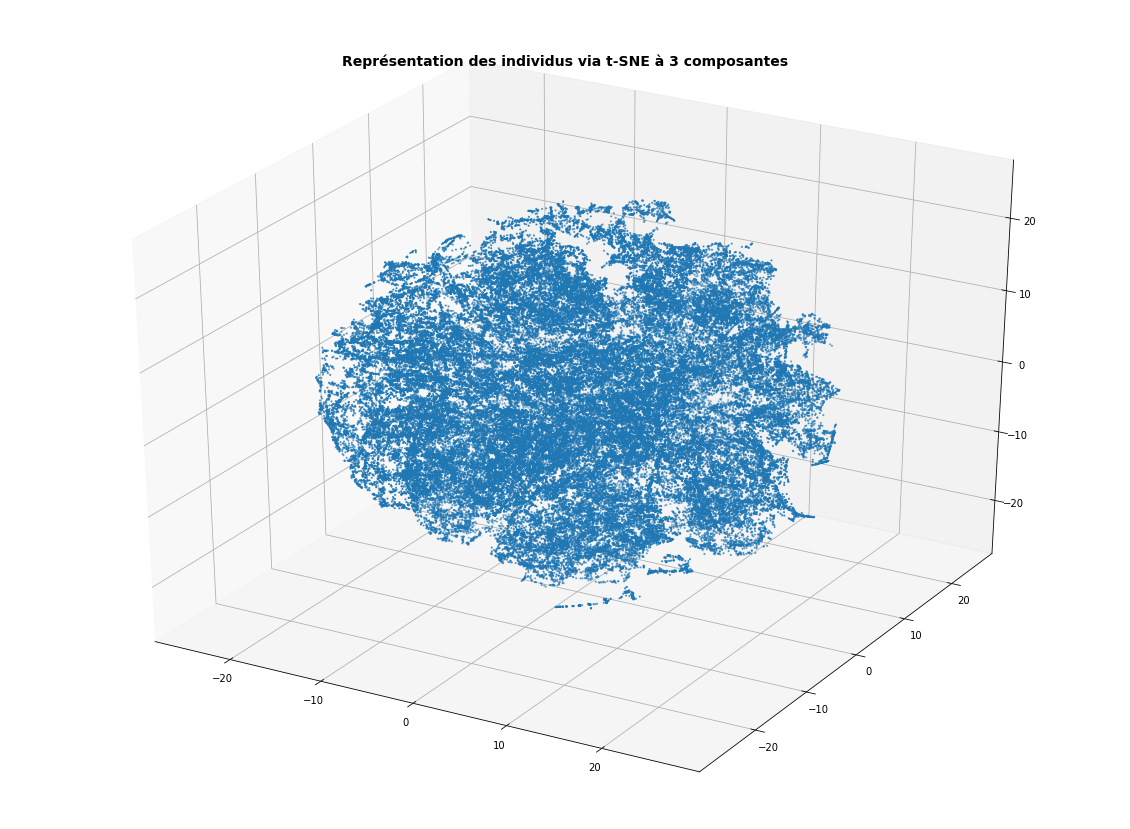

In [542]:
# Représentation des individus via t-SNE à 3 composantes

# afficher chaque observation
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

ax.scatter(data_std_restricted_TSNEtransf3[:, 0],
           data_std_restricted_TSNEtransf3[:, 1],
           data_std_restricted_TSNEtransf3[:, 2], marker='.', s=5)

plt.title('Représentation des individus via t-SNE à 3 composantes',
          fontsize=14, fontweight=800)
plt.show()

## 3.3. Recherche du nb optimal de clusters k
**Via le coefficient de silhouette** --> qui varie entre -1 (pire classification) et +1 (meilleure classification)

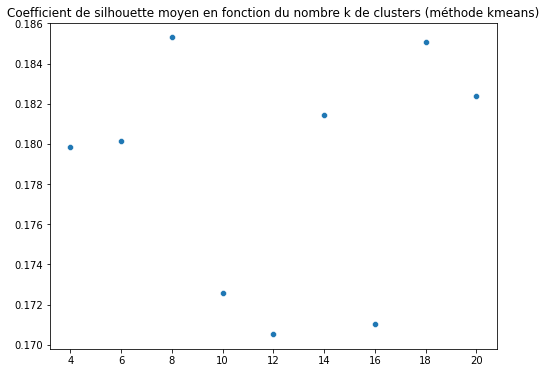

Le coefficient de silhouette est le plus proche de 1 pour 8 clusters, avec une valeur de 0.18530193417000485


In [531]:
# sur range grossier de nb de clusters d'abord...
range_n_clusters = range(4,21,2)

coeff_silh_kmeans_data_std_restricted = {}

# Calcul des coefficients de silhouettes moyens en fonction du nb de clusters
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, init='k-means++')
    cluster_labels = clusterer.fit_predict(data_std_restricted)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_std_restricted, cluster_labels)
    coeff_silh_kmeans_data_std_restricted[n_clusters] = silhouette_avg

# Visualisation de l'évolution du coeff de silhouette en fonction du nb de clusters    
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre k de clusters (méthode kmeans)')
sns.scatterplot(x = list(coeff_silh_kmeans_data_std_restricted.keys()),
y = list(coeff_silh_kmeans_data_std_restricted.values()))
plt.show()

# Nb de clusters optimal et coeff de silhouette associé
print('Le coefficient de silhouette est le plus proche de 1 pour {} clusters, avec une valeur de {}'\
     .format(list(coeff_silh_kmeans_data_std_restricted.keys())\
             [list(coeff_silh_kmeans_data_std_restricted.values())\
              .index(max(coeff_silh_kmeans_data_std_restricted.values()))],
             max(coeff_silh_kmeans_data_std_restricted.values())))

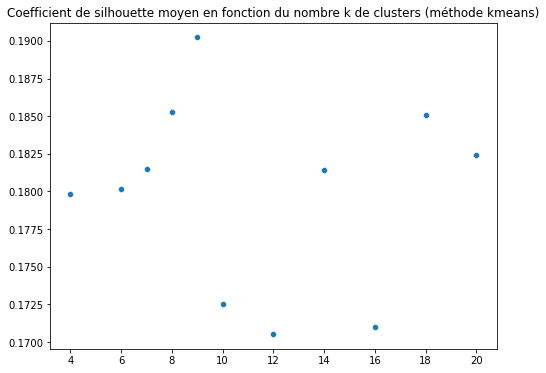

**Bilan:** Le coefficient de silhouette est le plus proche de 1 pour 9 clusters, avec une valeur de 0.19022671793368134


In [533]:
# ... puis sur range affiné autour de la valeur optimale trouvée via range grossier
range_n_clusters = [7, 9]

#coeff_silh_kmeans_data_std = {} # non-réinitialisé

# Calcul des coefficients de silhouettes moyens en fonction du nb de clusters
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, init='k-means++')
    cluster_labels = clusterer.fit_predict(data_std_restricted)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_std_restricted, cluster_labels)
    coeff_silh_kmeans_data_std_restricted[n_clusters] = silhouette_avg

# Visualisation de l'évolution du coeff de silhouette en fonction du nb de clusters    
plt.figure(figsize=(8,6)),
plt.title('Coefficient de silhouette moyen en fonction du nombre k de clusters (méthode kmeans)')
sns.scatterplot(x = list(coeff_silh_kmeans_data_std_restricted.keys()),
y = list(coeff_silh_kmeans_data_std_restricted.values()))
plt.show()

# Nb de clusters optimal et coeff de silhouette associé
print('**Bilan:** Le coefficient de silhouette est le plus proche de 1 pour {} clusters, avec une valeur de {}'\
     .format(list(coeff_silh_kmeans_data_std_restricted.keys())\
             [list(coeff_silh_kmeans_data_std_restricted.values())\
              .index(max(coeff_silh_kmeans_data_std_restricted.values()))],
             max(coeff_silh_kmeans_data_std_restricted.values())))

**Via indice de Davies-Bouldin** qui varie entre 0 (meilleure classification) et + l'infini (pire classification).

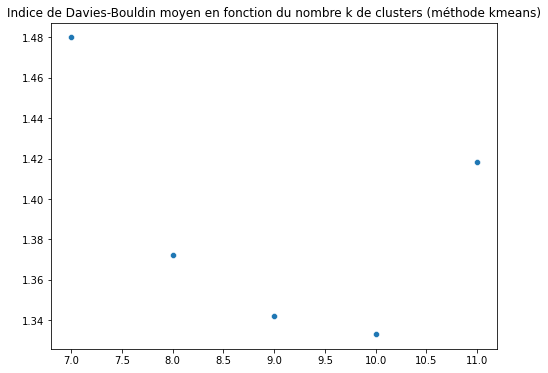

L'indice de Davies-Bouldin est le plus proche de 0 pour 10 clusters, avec une valeur de 1.3332204268833414


In [535]:
# sur range affiné 'élargi'
range_n_clusters = [7, 8, 9, 10, 11]

davies_bouldin_kmeans_data_std_restricted = {}

# Calcul des coefficients de silhouettes moyens en fonction du nb de clusters
for n_clusters in range_n_clusters:
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, init='k-means++')
    cluster_labels = clusterer.fit_predict(data_std_restricted)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    davies_bouldin_avg = davies_bouldin_score(data_std_restricted, cluster_labels)
    davies_bouldin_kmeans_data_std_restricted[n_clusters] = davies_bouldin_avg

# Visualisation de l'évolution de l'indice de Davies-Bouldin en fonction du nb de clusters    
plt.figure(figsize=(8,6)),
plt.title('Indice de Davies-Bouldin moyen en fonction du nombre k de clusters (méthode kmeans)')
sns.scatterplot(x = list(davies_bouldin_kmeans_data_std_restricted.keys()),
y = list(davies_bouldin_kmeans_data_std_restricted.values()))
plt.show()

# Nb de clusters optimal et indice de Davies-Bouldin associé
print('L\'indice de Davies-Bouldin est le plus proche de 0\
 pour {} clusters, avec une valeur de {}'\
     .format(list(davies_bouldin_kmeans_data_std_restricted.keys())\
                 [list(davies_bouldin_kmeans_data_std_restricted.values())\
                  .index(min(davies_bouldin_kmeans_data_std_restricted.values()))],
             min(davies_bouldin_kmeans_data_std_restricted.values())))

**==> k optimal = 9 car coeff silhouette maximal pour k=9 et 2ème valeur plus petite de l'indice de Davies-Bouldin pour k =9**

**Remarque:**
- coeff silhouette moins élevé pour clustering k-means 9 clusters sur data_std_restricted (0.19) que clustering k-means 19 clusters sur data_std (0.24)
- indice de Davies-Bouldin comparable pour les deux cas

## 3.4. Visualisation du clustering k-means optimal sur data_std_restricted

In [543]:
# Run du kmeans optimal
optim_kmeans_clusterer2 = KMeans(n_clusters=9, random_state=10, init='k-means++')
optim_kmeans_cluster_labels2 = optim_kmeans_clusterer2.fit_predict(data_std_restricted)

In [546]:
# colors to use for each cluster
colors_sns2 = {}
for i in range (0,10,1):
    colors_sns2[i] = cm.nipy_spectral(i / 9)
    
colors_plt2 = cm.nipy_spectral(optim_kmeans_cluster_labels2.astype(float) / 9)

Text(0.5, 1.0, 'Représentation des 9 clusters (k-means) sur les axes de la PCA')

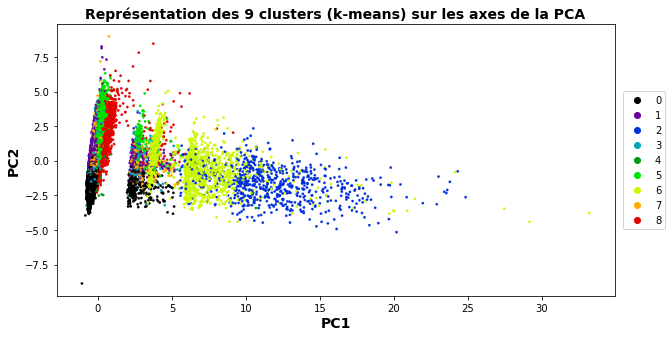

In [547]:
# Représentation sur PCA à 2 PC
plt.figure(figsize=(10,5))

sns.scatterplot(x=data_std_restricted_projected[:, 0],
                y=data_std_restricted_projected[:, 1],
                marker='.', edgecolor=None,
                hue=optim_kmeans_clusterer2.labels_, legend='full',
                palette=colors_sns2, s=20)

plt.legend(loc='center right', bbox_to_anchor=(1.1, 0.5))

plt.xlabel('PC1', fontsize=14, fontweight=800)
plt.ylabel('PC2', fontsize=14, fontweight=800)

plt.title('Représentation des 9 clusters (k-means) sur les axes de la PCA',
          fontsize=14, fontweight=800)

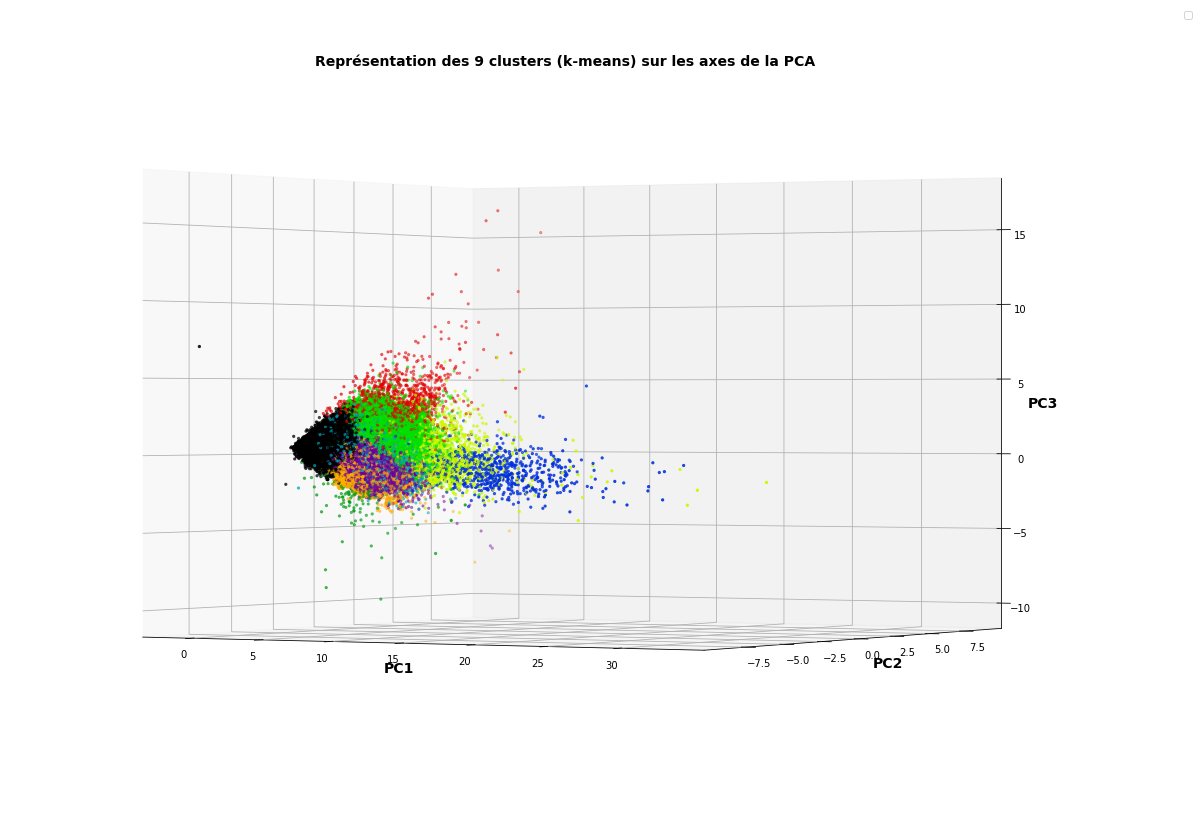

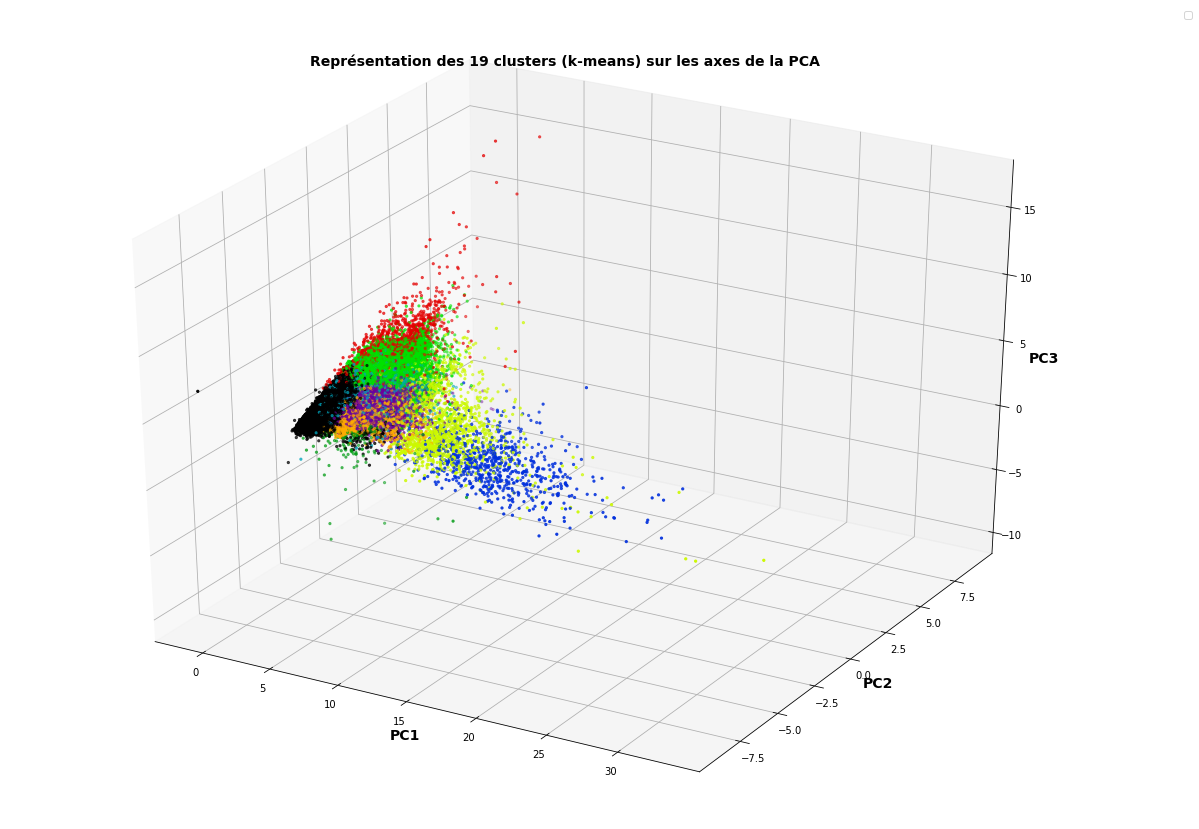

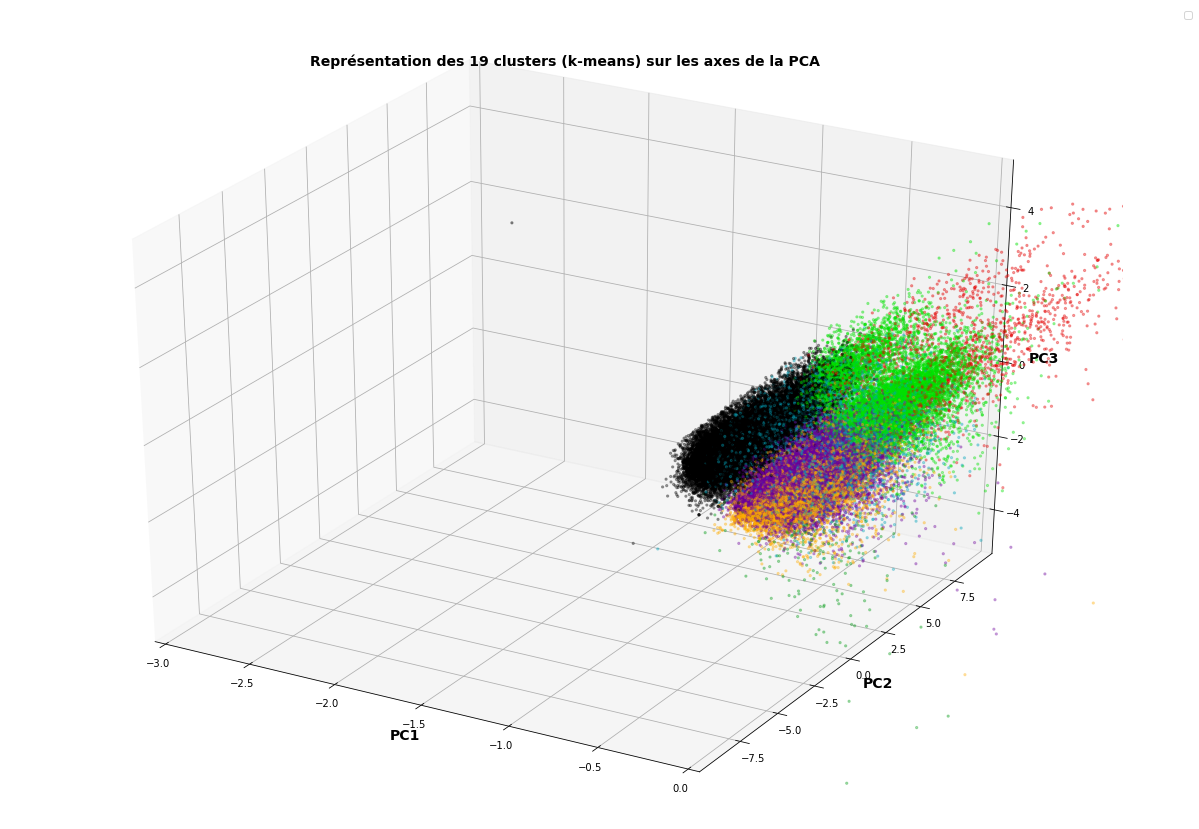

In [553]:
# Représentation sur PCA à 3 PC

########## PLOT 1 ##########
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=0, azim=300)

sc = ax.scatter(data_std_restricted_projected3[:, 0],
                data_std_restricted_projected3[:, 1],
                data_std_restricted_projected3[:, 2],
                marker='.', c=colors_plt2)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

plt.title('Représentation des 9 clusters (k-means) sur les axes de la PCA',
          fontsize=14, fontweight=800)

plt.show()

########## PLOT 2 ##########
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=30, azim=300)

sc = ax.scatter(data_std_restricted_projected3[:, 0],
                data_std_restricted_projected3[:, 1],
                data_std_restricted_projected3[:, 2],
           marker='.', c=colors_plt2)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

plt.title('Représentation des 19 clusters (k-means) sur les axes de la PCA',
          fontsize=14, fontweight=800)

plt.show()


########## PLOT 3 ##########
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=30, azim=300)

sc = ax.scatter(data_std_restricted_projected3[:, 0],
                data_std_restricted_projected3[:, 1],
                data_std_restricted_projected3[:, 2],
           marker='.', c=colors_plt2)

plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

ax.set_xlim(-3,0)
#ax.set_ylim()
ax.set_zlim(-5,5)

plt.title('Représentation des 19 clusters (k-means) sur les axes de la PCA',
          fontsize=14, fontweight=800)

plt.show()

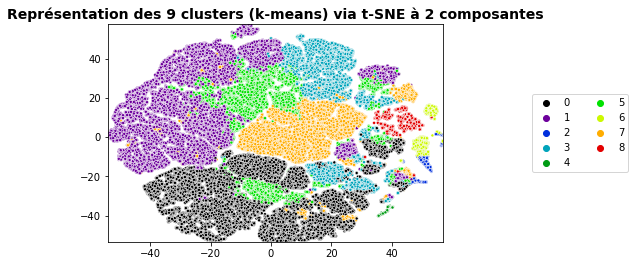

In [554]:
# Représentation sur t-SNE à 2 composantes
plt.figure()

sns.scatterplot(x=data_std_restricted_TSNEtransf[:, 0],
                y=data_std_restricted_TSNEtransf[:, 1],
                marker='.',
                hue=optim_kmeans_clusterer2.labels_, legend='full',
                palette=colors_sns2)

plt.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=2)
    
# On redéfinit les axes pour bien voir tous les points
plt.xlim([np.min(data_std_restricted_TSNEtransf[:, 0]),
          np.max(data_std_restricted_TSNEtransf[:, 0])])
plt.ylim([np.min(data_std_restricted_TSNEtransf[:, 1]),
          np.max(data_std_restricted_TSNEtransf[:, 1])])

plt.title('Représentation des 9 clusters (k-means) via t-SNE à 2 composantes',
          fontsize=14, fontweight=800)
plt.show()

C:\Users\user\anaconda3\lib\site-packages\matplotlib\collections.py:988: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


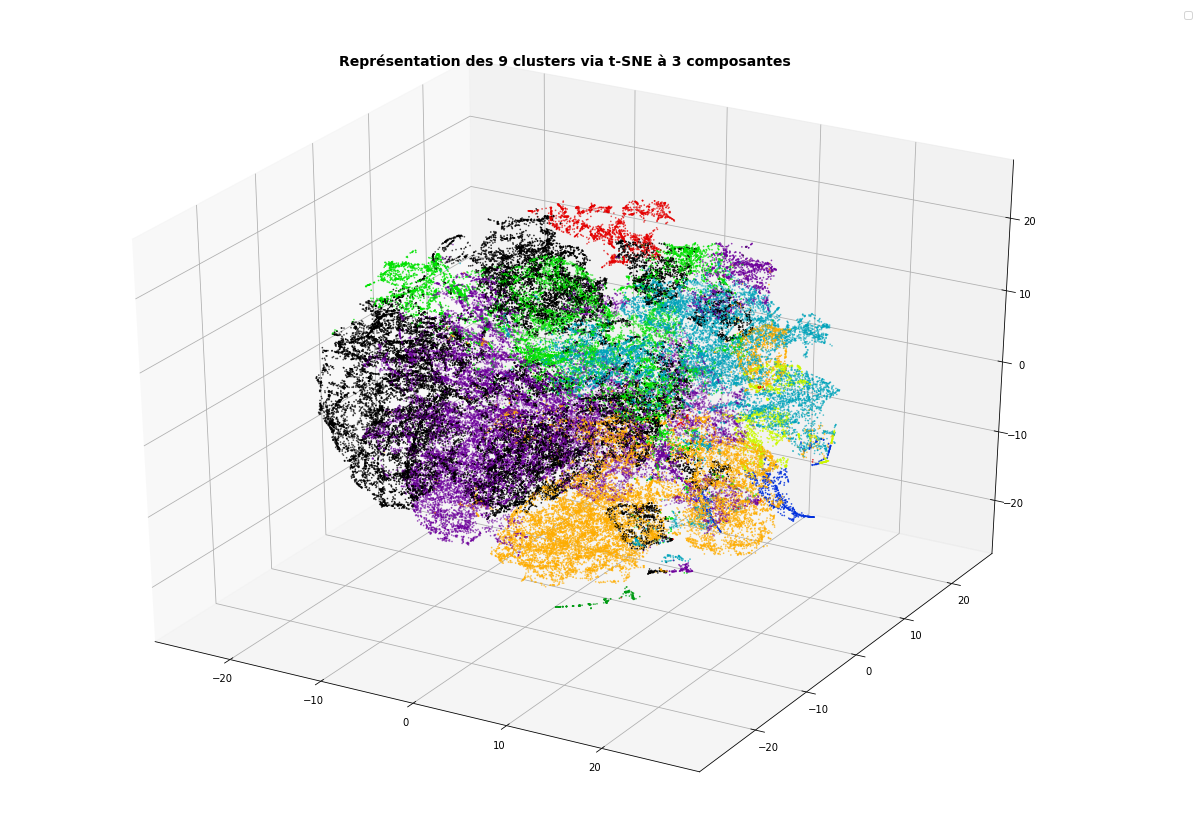

In [555]:
# Représentation via t-SNE à 3 composantes
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d')

# plot
sc = ax.scatter(data_std_restricted_TSNEtransf3[:, 0],
                data_std_restricted_TSNEtransf3[:, 1],
                data_std_restricted_TSNEtransf3[:, 2],
                marker='.', s=2, c=colors_plt2)

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

plt.title('Représentation des 9 clusters via t-SNE à 3 composantes',
          fontsize=14, fontweight=800)

plt.show()

## 3.5. Interprétation des clusters obtenus via k-means sur data_std_restricted:

### 3.5.1. Plot des centroïdes sur graphe des contributions des variables aux PC

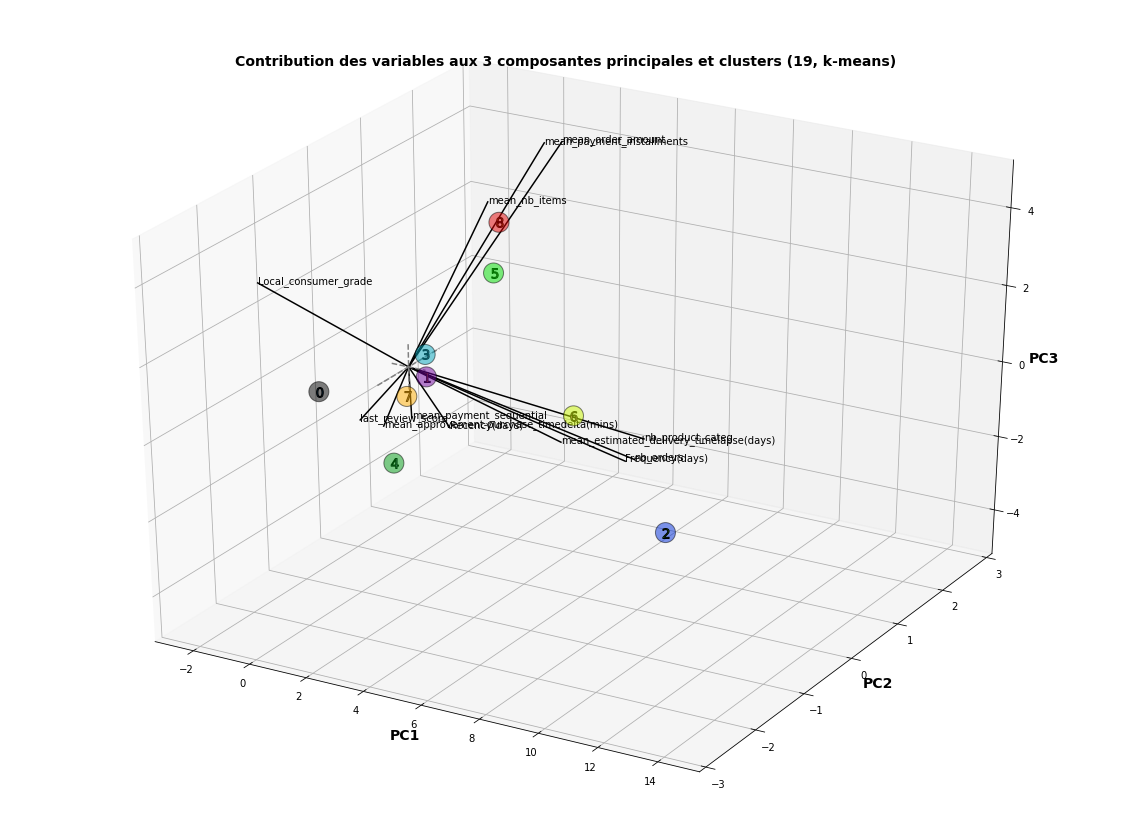

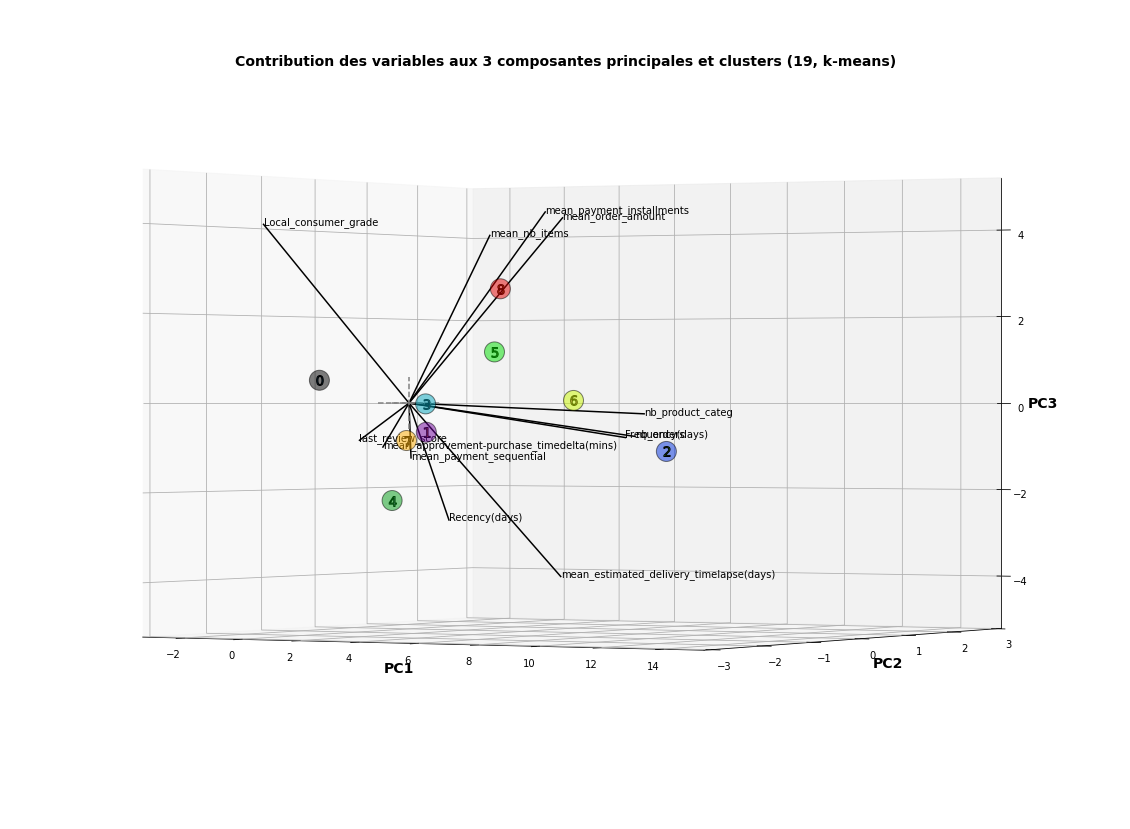

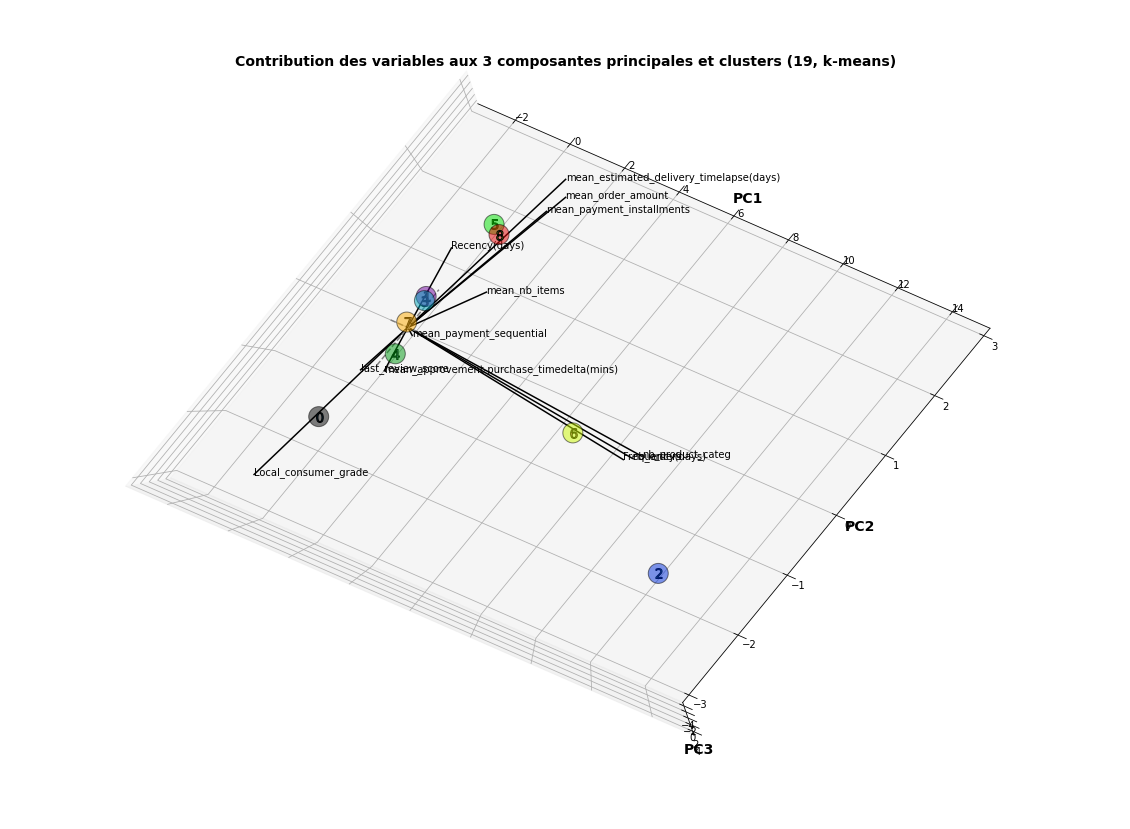

In [566]:
# Représentation de la contribution des variables aux PC avec centroïdes des clusters

pcs = pca3.components_

# couleurs
colors_plt = cm.nipy_spectral(optim_kmeans_cluster_labels2.astype(float) / 9)
centers_labels2 = np.array(range(0,9,1))
colors_plt2 = cm.nipy_spectral(centers_labels2.astype(float) / 9)


########### PLOT 1 #############

# plot base figure
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=30, azim=300)

# Afficher les vecteurs de contribution des variables
for i, (x, y, z) in enumerate(zip(pcs[0, :], pcs[1, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y, z)
    ax.plot([0, x*15], [0, y*5], [0, z*10], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    if abs(x) > 0.1 or abs(y) > 0.1 or abs(z) > 0.1:
        ax.text(x*15, y*5, z*10,
                data_std_restricted.columns[i],
                fontsize='10')

# Afficher une ligne y=0, une ligne x=0 et une ligne z=0
plt.plot([-0.6, 0.6], [0, 0], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.6, 0.6], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [0, 0], [-0.6, 0.6], color='grey', ls='--')

# Afficher les individus
ax.scatter(data_std_restricted_projected3[:, 0],
           data_std_restricted_projected3[:, 1],
           data_std_restricted_projected3[:, 2],
           marker='.', c=colors_plt, alpha=0)

# Afficher les centroïdes de chaque cluster k-means
    # calcul des coordonnées des centroïdes sur les 3 1ers PC 
centers2 = optim_kmeans_clusterer2.cluster_centers_
centers2_projected3 = pca3.transform(centers2)
    # ajout des centroïdes
ax.scatter(centers2_projected3[:, 0],
           centers2_projected3[:, 1],
           centers2_projected3[:, 2],
           marker='o',
           c=colors_plt2, alpha=0.5,
           s=400, edgecolor='k')
for i, c in enumerate(centers2_projected3):
    ax.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

ax.set_xlim(-3,15)
ax.set_ylim(-3,3)
ax.set_zlim(-5,5)

plt.title('Contribution des variables aux 3 composantes principales et clusters (19, k-means)',
          fontsize=14, fontweight=800)

plt.show()


########### PLOT 2 #############

# plot base figure
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=0, azim=300)

# Afficher les vecteurs de contribution des variables
for i, (x, y, z) in enumerate(zip(pcs[0, :], pcs[1, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y, z)
    ax.plot([0, x*15], [0, y*5], [0, z*10], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    if abs(x) > 0.1 or abs(y) > 0.1 or abs(z) > 0.1:
        ax.text(x*15, y*5, z*10,
                data_std_restricted.columns[i],
                fontsize='10')

# Afficher une ligne y=0, une ligne x=0 et une ligne z=0
plt.plot([-0.6, 0.6], [0, 0], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.6, 0.6], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [0, 0], [-0.6, 0.6], color='grey', ls='--')

# Afficher les individus
ax.scatter(data_std_restricted_projected3[:, 0],
           data_std_restricted_projected3[:, 1],
           data_std_restricted_projected3[:, 2],
           marker='.', c=colors_plt, alpha=0)

# Afficher les centroïdes de chaque cluster k-means
    # calcul des coordonnées des centroïdes sur les 3 1ers PC 
centers2 = optim_kmeans_clusterer2.cluster_centers_
centers2_projected3 = pca3.transform(centers2)
    # ajout des centroïdes
ax.scatter(centers2_projected3[:, 0],
           centers2_projected3[:, 1],
           centers2_projected3[:, 2],
           marker='o',
           c=colors_plt2, alpha=0.5,
           s=400, edgecolor='k')
for i, c in enumerate(centers2_projected3):
    ax.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

ax.set_xlim(-3,15)
ax.set_ylim(-3,3)
ax.set_zlim(-5,5)

plt.title('Contribution des variables aux 3 composantes principales et clusters (19, k-means)',
          fontsize=14, fontweight=800)

plt.show()



########### PLOT 3 #############

# plot base figure
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(projection='3d', elev=90, azim=300)

# Afficher les vecteurs de contribution des variables
for i, (x, y, z) in enumerate(zip(pcs[0, :], pcs[1, :], pcs[2, :])):
    # Afficher un segment de l'origine au point (x, y, z)
    ax.plot([0, x*15], [0, y*5], [0, z*10], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    if abs(x) > 0.1 or abs(y) > 0.1 or abs(z) > 0.1:
        ax.text(x*15, y*5, z*10,
                data_std_restricted.columns[i],
                fontsize='10')

# Afficher une ligne y=0, une ligne x=0 et une ligne z=0
plt.plot([-0.6, 0.6], [0, 0], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-0.6, 0.6], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [0, 0], [-0.6, 0.6], color='grey', ls='--')

# Afficher les individus
ax.scatter(data_std_restricted_projected3[:, 0],
           data_std_restricted_projected3[:, 1],
           data_std_restricted_projected3[:, 2],
           marker='.', c=colors_plt, alpha=0)

# Afficher les centroïdes de chaque cluster k-means
    # calcul des coordonnées des centroïdes sur les 3 1ers PC 
centers2 = optim_kmeans_clusterer2.cluster_centers_
centers2_projected3 = pca3.transform(centers2)
    # ajout des centroïdes
ax.scatter(centers2_projected3[:, 0],
           centers2_projected3[:, 1],
           centers2_projected3[:, 2],
           marker='o',
           c=colors_plt2, alpha=0.5,
           s=400, edgecolor='k')
for i, c in enumerate(centers2_projected3):
    ax.scatter(c[0], c[1], c[2], marker='$%d$' % i, alpha=1,
                    s=100, edgecolor='k')

ax.set_xlabel('PC1', fontsize=14, fontweight=800)
ax.set_ylabel('PC2', fontsize=14, fontweight=800)
ax.set_zlabel('PC3', fontsize=14, fontweight=800)

ax.set_xlim(-3,15)
ax.set_ylim(-3,3)
ax.set_zlim(-5,5)

plt.title('Contribution des variables aux 3 composantes principales et clusters (19, k-means)',
          fontsize=14, fontweight=800)

plt.show()

### 3.5.2. Statistiques de chaque variable pour chaque cluster

In [570]:
#data_restricted = data[['mean_payment_sequential', 'mean_payment_installments',
#       'nb_product_categ', 'last_review_score', 'Recency(days)', 'nb_orders',
#       'Frequency(days)', 'mean_order_amount', 'mean_nb_items',
#       'mean_approvement-purchase_timedelta(mins)',
#       'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']]
data_restricted = data.drop('8d50f5eadf50201ccdcedfb9e2ac8455')

data_w_cluster2 = data_restricted.copy()
data_w_cluster2['cluster'] = optim_kmeans_cluster_labels2

cluster2_stat = data_w_cluster2.groupby('cluster')['mean_payment_sequential'].size().to_frame()
cluster2_stat.rename(columns={'mean_payment_sequential':'size'}, inplace=True)

for feature, aggfunc in [['mean_payment_sequential', pd.Series.mean],
                         ['mean_payment_installments', pd.Series.mean],
                         ['nb_product_categ',pd.Series.mean],
                         ['last_review_score',pd.Series.mean],
                         ['Recency(days)',pd.Series.mean],
                         ['nb_orders',pd.Series.mean],
                         ['Frequency(days)',pd.Series.mean],
                         ['mean_order_amount',pd.Series.mean],
                         ['mean_nb_items',pd.Series.mean],
                         ['mean_approvement-purchase_timedelta(mins)',pd.Series.mean],
                         ['mean_estimated_delivery_timelapse(days)',pd.Series.mean],
                         ['Local_consumer_grade',pd.Series.mean],
                         ['customer_region_SE',pd.Series.sum],
                         ['customer_region_NE',pd.Series.sum],
                         ['customer_region_cW',pd.Series.sum],
                         ['customer_region_S',pd.Series.sum],
                         ['customer_region_N',pd.Series.sum],
                         ['most_freq_product_categ_appliances/housewares',pd.Series.sum],
                         ['most_freq_product_categ_health/beauty',pd.Series.sum],
                         ['most_freq_product_categ_auto/garden/construction',pd.Series.sum],
                         ['most_freq_product_categ_daily_life_products',pd.Series.sum],
                         ['most_freq_product_categ_office/commerce',pd.Series.sum],
                         ['most_freq_product_categ_unknown/other',pd.Series.sum],
                         ['most_freq_product_categ_home',pd.Series.sum],
                         ['most_freq_product_categ_electronics',pd.Series.sum],
                         ['most_freq_product_categ_children',pd.Series.sum],
                         ['most_freq_product_categ_cool_stuff',pd.Series.sum],
                         ['most_freq_product_categ_fashion',pd.Series.sum],
                         ['most_freq_product_categ_leisure/culture',pd.Series.sum],
                         ['most_freq_payment_type_credit_card',pd.Series.sum],
                         ['most_freq_payment_type_voucher',pd.Series.sum],
                         ['most_freq_payment_type_boleto',pd.Series.sum],
                         ['most_freq_payment_type_debit_card',pd.Series.sum]]:
    cluster_stat_to_add = data_w_cluster2.groupby('cluster')\
        [feature].agg(aggfunc).to_frame()
    cluster2_stat = pd.merge(cluster2_stat, cluster_stat_to_add,
                             left_index=True, right_index=True, how='left')

In [590]:
def highlight_max(s, props=''):
    return np.where(s == np.nanmax(s.values), props, '')
def highlight_min(s, props=''):
    return np.where(s == np.nanmin(s.values), props, '')
s1 = cluster2_stat.style.apply(highlight_max,
                               props='color:white;background-color:darkred',
                               axis=0)
s2 = s1.apply(highlight_min,
              props='color:white;background-color:darkblue',
              axis=0)
s3 = s2.bar(subset=['size'], color='darkgray')
s3

### 3.5.3. Interprétation
- **cluster 0**: last_review_score *close to max*, mean_order_amount *min*, mean_estimated_delivery_timelapse(days) *min*, Local_consumer_grade *max* ==> **clients satisfaits, mais dépensant peu, achetant localement et/ou pressés de recevoir leurs produits**
- **clusters 1**: last_review_score	*max*, mean_approvement-purchase_timedelta(mins) *min* = compulsifs?, mean_estimated_delivery_timelapse(days) *max*, Local_consumer_grade *min* ==> **clients satisfaits, achetant compulsivement et localement car pressés de recevoir leurs produits**
- **clusters 2**: (mean_payment_installments *moy*), nb_product_categ *close to max*, Recency(days) *min*, nb_orders *max*, Frequency(days) *max* ==> **clients bons et fidèles: achetant fréquemment, beaucoup de produits, depuis longtemps**
- **clusters 3**: last_review_score *min* ==> **clients insatisfaits**
- **clusters 4**: mean_payment_sequential *max*, Recency(days) *max* ==> **clients récents attirés par vouchers**
- **clusters 5**: mean_payment_installments *max*, mean_order_amount *max* ==> **clients achetant peu d'articles mais des articles à montants élevés et payant en plusieurs fois**
- **clusters 6**: (mean_payment_installments *moy*), nb_orders *high*, nb_product_categ *max*, Frequency(days) *high* = most freq clients, mean_nb_items *relatively high* ==> **nouveaux bons clients: achetant fréquemment, beaucoup de produits, mais depuis récemment**
- **clusters 7**: last_review_score *close to max*, mean_approvement-purchase_timedelta(mins) *max* = inverse compulsifs?, mean_estimated_delivery_timelapse(days) *close to max*, Local_consumer_grade *close to min* ==> **clients satisfaits, achetant localement car pressés de recevoir leurs produits mais non compulsivement / prenant le temps de réfléchir avant de valider leur commande**
- **clusters 8**: (mean_payment_installments *moy*), mean_order_amount *close to max*, mean_nb_items *max* ==> **clients achetant beaucoup d'articles pour un montant total élevé**

In [596]:
# Ajout des interprétation au tableau récap
cluster2_stat.insert(1, 'Type of clients', '')

In [614]:
cluster2_stat.iloc[0,1] = 'Clients peu dépensiers, locaux et/ou pressés'
cluster2_stat.iloc[1,1] = 'Acheteurs satisfaits, compulsifs et pressés'
cluster2_stat.iloc[2,1] = 'Très bons clients, fidèles'
cluster2_stat.iloc[3,1] = 'Clients insatisfaits'
cluster2_stat.iloc[4,1] = 'Clients récents attirés par vouchers'
cluster2_stat.iloc[5,1] = 'Clients dépensiers (peu d\'articles)'
cluster2_stat.iloc[6,1] = 'Nouveaux très bons clients'
cluster2_stat.iloc[7,1] = 'Acheteurs satisfaits, non compulsifs, pressés'
cluster2_stat.iloc[8,1] = 'Clients dépensiers (beaucoup d\'articles)'

slice_ = ['mean_payment_sequential',
          'mean_payment_installments',
          'nb_product_categ',
          'last_review_score',
          'Recency(days)',
          'nb_orders',
          'Frequency(days)',
          'mean_order_amount',
          'mean_nb_items',
          'mean_approvement-purchase_timedelta(mins)',
          'mean_estimated_delivery_timelapse(days)',
          'Local_consumer_grade']
s1 = cluster2_stat.style.apply(highlight_max,
                               props='color:red',
                               axis=0,
                               subset=slice_)
s2 = s1.apply(highlight_min,
              props='color:blue',
              axis=0,
              subset=slice_)
s3 = s2.bar(subset=['size'], color='darkgray')
s3

# 4. Evaluation de la fréquence de MAJ de la segmentation, via évaluation de la stabilité du clustering

In [655]:
# Chargement des données de bases cleanées
base_data = pd.read_csv("merged_df_clean.csv",
                        parse_dates=['order_purchase_timestamp',
                                     'order_approved_at',
                                     'order_delivered_carrier_date',
                                     'order_delivered_customer_date',
                                     'order_estimated_delivery_date',
                                     'review_creation_date',
                                     'review_answer_timestamp',
                                     'shipping_limit_date'])

# Date la plus récente
most_recent_date_ref = max(max(base_data.order_purchase_timestamp),
                           max(base_data.order_approved_at),
                           max(base_data.order_delivered_carrier_date),
                           max(base_data.order_delivered_customer_date))

for date in ['order_purchase_timestamp',
                       'order_approved_at',
                       'order_delivered_carrier_date',
                       'order_delivered_customer_date']:
    if most_recent_date_ref == max(base_data[date]):
        print('La date la plus récente est {} et correspond à la variable {}'\
              .format(most_recent_date_ref, date))

La date la plus récente est 2018-10-18 03:55:27 et correspond à la variable order_approved_at


## 4.1. Evaluation de la stabilité des clusters via coeff de silhouette, i.e. stabilité du nb de clusters optimal

In [700]:
def prepare_data_and_run_clustering_silh(monthdelta):
    ''' 
    Fonction permettant de réduire les données aux commandes passées
    avant le "date la plus récente - x mois" (où x est défini par la
    variable "monthdelta"), de les préparer (feature engineering, 
    transformation, standardisation, ...), et de calculer le nb de 
    cluster optimal via optimisation du coefficient de silhouette
    '''
    print('#### Restriction de l\'extension temporelle des données de base pour monthdelta = {} ####'\
         .format(monthdelta))
    merged_df = base_data[base_data['order_approved_at'] < most_recent_date_ref - pd.DateOffset(months=monthdelta)]
    # Verif:
    print('base_data shape:', base_data.shape)
    print('time restricted base data:', merged_df.shape)
    
    # Création du nouveau df avec données pour clustering
    print('-' * 100)
    print('#### Création du nouveau dataframe \'data\' dont les index sont \
    les \'customer_unique_id\' des données temporellement réduites####')
    data = pd.DataFrame()
        # Ajout customer_unique_id en tant qu'index
    data['customer_unique_id'] = merged_df.customer_unique_id.unique().tolist()
    data = data.set_index('customer_unique_id')
        # verif
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('-' * 100)

    # Ajout de 'mean_payment_sequential', 
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('mean_payment_sequential', 'payment_sequential', pd.Series.mean))
        # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')\
        ['payment_sequential'].agg(pd.Series.mean).to_frame()
        # renommage de la variable ajoutée
    add_var.rename(columns={'payment_sequential': 'mean_payment_sequential'},
                   inplace=True)
        # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
        # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)
     
    # Ajout de 'mean_payment_installments'
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('mean_payment_installments', 'payment_installments', pd.Series.mean))
        # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')\
        ['payment_installments'].agg(pd.Series.mean).to_frame()
        # renommage de la variable ajoutée
    add_var.rename(columns={'payment_installments': 'mean_payment_installments'},
                   inplace=True)
        # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
        # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)
        
    # Ajout de 'nb_product_categ'
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('nb_product_categ', 'product_category_recateg', pd.Series.nunique))
        # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')\
        ['product_category_recateg'].agg(pd.Series.nunique).to_frame()
        # renommage de la variable ajoutée
    add_var.rename(columns={'product_category_recateg': 'nb_product_categ'}, inplace=True)
        # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
        # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout de last_review_score
    print('#### ajout de {} à partir de {} ####'.format('last_review_score', 'review_score'))
        # isolation/création variable à ajouter
    add_var = merged_df.sort_values('review_creation_date')\
        .groupby('customer_unique_id')['review_score'].last().to_frame()
        # renommage de la variable ajoutée
    add_var.rename(columns={'review_score': 'last_review_score'}, inplace=True)
        # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
        # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout Récence et Ancienneté
        # Définition de la date la plus récente
    most_recent_date = max(max(merged_df.order_purchase_timestamp),
                   max(merged_df.order_approved_at),
                   max(merged_df.order_delivered_carrier_date),
                   max(merged_df.order_delivered_customer_date))
    print('most_recent_date:', most_recent_date)
        # Ajout Récence (Recency(days))
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('Recency(days)', 'order_purchase_timestamp',
                  lambda x: (most_recent_date - x.max()) / np.timedelta64(1, "D")))
            # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')['order_purchase_timestamp']\
        .agg(lambda x: (most_recent_date - x.max()) / np.timedelta64(1, "D")).to_frame()
            # renommage de la variable ajoutée
    add_var.rename(columns={'order_purchase_timestamp': 'Recency(days)'}, inplace=True)
            # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
            # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)         
        # Ajout Ancienneté (Seniority(days))
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('Seniority(days)', 'order_purchase_timestamp',
                  lambda x: (most_recent_date - x.min()) / np.timedelta64(1, "D")))
            # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')['order_purchase_timestamp']\
        .agg(lambda x: (most_recent_date - x.min()) / np.timedelta64(1, "D")).to_frame()
            # renommage de la variable ajoutée
    add_var.rename(columns={'order_purchase_timestamp': 'Seniority(days)'}, inplace=True)
            # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
            # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)
    
    # Ajout nb total de commandes passées par le client sur l'ensemble de la période (nb_orders) 
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('nb_orders', 'order_id', pd.Series.nunique))
        # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')\
        ['order_id'].agg(pd.Series.nunique).to_frame()
        # renommage de la variable ajoutée
    add_var.rename(columns={'order_id': 'nb_orders'}, inplace=True)
        # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
        # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)
    
    # Ajout de Fréquence d'achat (Frequency(days))
    print('#### ajout de {} à partir de {} ####'\
          .format('Frequency(days)', 'Recency, Seniority et nb_orders'))
    data['Frequency(days)'] = (data['Seniority(days)'] - data['Recency(days)']) / data.nb_orders
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout montant panier moyen (mean_order_amount)
    print('#### ajout de mean_order_amount à partir de order_id et payment_value ####')
    add_var = merged_df[merged_df.order_item_id < 1.5]\
        .groupby(['customer_unique_id','order_id'])['payment_value'].sum().to_frame()\
        .groupby('customer_unique_id')['payment_value'].mean().to_frame()
    add_var.rename(columns={'payment_value': 'mean_order_amount'}, inplace=True)
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout volume d'achat moyen (mean_nb_items)
    print('#### ajout de mean_nb_items à partir de order_id et order_item_id ####')
    add_var = merged_df.groupby(['customer_unique_id','order_id'])\
        ['order_item_id'].max().to_frame()\
        .groupby('customer_unique_id')['order_item_id'].mean().to_frame()
    add_var.rename(columns={'order_item_id': 'mean_nb_items'}, inplace=True)
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout de temps moyen entre création panier et transaction (mean_ and min_ approvement-purchase_timedelta)
        # Création de approvement-purchase_timedelta dans merged_df
    merged_df['approvement-purchase_timedelta(min)'] =\
        (merged_df.order_approved_at - merged_df.order_purchase_timestamp)\
        / np.timedelta64(1, "m")
        # Ajout de mean_approvement-purchase_timedelta dans data
    print('#### ajout de mean_approvement-purchase_timedelta(mins) à partir de \
    order_id et approvement-purchase_timedelta(min) ####')
    add_var = merged_df.groupby(['customer_unique_id','order_id'])\
        ['approvement-purchase_timedelta(min)'].mean().to_frame()\
        .groupby('customer_unique_id')['approvement-purchase_timedelta(min)'].mean().to_frame()
    add_var.rename(columns={'approvement-purchase_timedelta(min)': 'mean_approvement-purchase_timedelta(mins)'},
                   inplace=True)
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout de délai moyen de livraison estimé (mean_estimated_delivery_timelapse(days))
        # Ajout estimated_delivery_timelapse(days) dans merged_df
    merged_df['estimated_delivery_timelapse(days)'] =\
        (merged_df.order_estimated_delivery_date - merged_df.order_purchase_timestamp)\
        / np.timedelta64(1, "D")
        # Ajout mean_estimated_delivery_timelapse(days) à data
    print('#### ajout de mean_estimated_delivery_timelapse(days) à partir de \
    order_id et estimated_delivery_timelapse(days) ####')
    add_var = merged_df.groupby(['customer_unique_id','order_id'])\
        ['estimated_delivery_timelapse(days)'].mean().to_frame()\
        .groupby('customer_unique_id')['estimated_delivery_timelapse(days)'].mean().to_frame()
    add_var.rename(columns={'estimated_delivery_timelapse(days)': 'mean_estimated_delivery_timelapse(days)'},
                   inplace=True)
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # consommateur local ou non
        # Ajout Local_consumer à merged df
    merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)
        # Ajout Local_consumer_grade à data
    print('#### ajout de Local_consumer_grade à partir de order_id, \
    order_item_id et Local_consumer ####')
    add_var = merged_df.groupby(['customer_unique_id','order_id', 'order_item_id'])\
        ['Local_consumer'].mean().to_frame()\
        .groupby('customer_unique_id')['Local_consumer'].mean().to_frame()
    add_var.rename(columns={'Local_consumer': 'Local_consumer_grade'},
                   inplace=True)
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    print('----------- FEATURE ENGINEERING DONE!! -----------')
    
    # Transformation logarithmique
    print('-' * 100)
    print('#### Transformation logarithmique ####')
    print('-' * 100)
    cols_to_log_transform = ['mean_order_amount',
                             'mean_approvement-purchase_timedelta(mins)']
    for f in cols_to_log_transform:
        data[f] = data[f].apply(lambda x : np.log(1+x))
        
    # restriction du df en entrées aux features d'intérêt
    data_restricted = data[['mean_payment_sequential', 'mean_payment_installments',
       'nb_product_categ', 'last_review_score', 'Recency(days)', 'nb_orders',
       'Frequency(days)', 'mean_order_amount', 'mean_nb_items',
       'mean_approvement-purchase_timedelta(mins)',
       'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']]
    
    # suppression de l'outlier
    if '8d50f5eadf50201ccdcedfb9e2ac8455' in data_restricted.index:
        data_restricted = data_restricted.drop('8d50f5eadf50201ccdcedfb9e2ac8455')   
        
    # standardisation
    print('#### Standardisation ####')
    print('-' * 100)
    std_scale = preprocessing.StandardScaler().fit(data_restricted)
    data_std_restricted = std_scale.transform(data_restricted)
    
     # Détermination du nb optimal de clusters par silhouette score
    print('#### Détermination du nb optimal de clusters par silhouette score ####')
    print('-' * 100)
        # range de k considéré
    range_n_clusters = [4,6,7,8,9,10,11,12]
        # Calcul des coefficients de silhouettes moyens en fonction du nb de clusters
    coeff_silh_kmeans_data_std_restricted = {}   
    for n_clusters in range_n_clusters:
            # Run du kmeans pour chaque nb de clusters testé
        clusterer = KMeans(n_clusters=n_clusters, random_state=10, init='k-means++')
        cluster_labels = clusterer.fit_predict(data_std_restricted)
            # Calcul du coeff de silhouette associé
        silhouette_avg = silhouette_score(data_std_restricted, cluster_labels)
            # Ajout à la liste des coeff de silhouette associés à ce dataset réduit
        coeff_silh_kmeans_data_std_restricted[n_clusters] = silhouette_avg

        # Nb de clusters optimal et coeff de silhouette associé
    optim_k_i = list(coeff_silh_kmeans_data_std_restricted.keys())\
                 [list(coeff_silh_kmeans_data_std_restricted.values())\
                  .index(max(coeff_silh_kmeans_data_std_restricted.values()))]
    optim_silh_i = max(coeff_silh_kmeans_data_std_restricted.values())
    k_optim_list[monthdelta] = optim_k_i
    silh_optim_list[monthdelta] = optim_silh_i

#### Restriction de l'extension temporelle des données de base pour monthdelta = 1 ####
base_data shape: (119151, 31)
time restricted base data: (119143, 31)
----------------------------------------------------------------------------------------------------
#### Création du nouveau dataframe 'data' dont les index sont     les 'customer_unique_id' des données temporellement réduites####
data shape: (96094, 0)
data unique indices: 96094
----------------------------------------------------------------------------------------------------
#### ajout de mean_payment_sequential à partir de payment_sequential via la fonction d'agrégation "<function Series.mean at 0x0000025761F48820>"####
variable to add - df shape: (96094, 1)
data shape: (96094, 1)
data unique indices: 96094
data columns: ['mean_payment_sequential']
----------------------------------------------------------------------------------------------------
#### ajout de mean_payment_installments à partir de payment_installments via l

<ipython-input-700-4405e03b08f8>:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\


variable to add - df shape: (96094, 1)
data shape: (96094, 11)
data unique indices: 96094
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)']
----------------------------------------------------------------------------------------------------
#### ajout de mean_estimated_delivery_timelapse(days) à partir de order_id et estimated_delivery_timelapse(days) ####


<ipython-input-700-4405e03b08f8>:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


variable to add - df shape: (96094, 1)
data shape: (96094, 12)
data unique indices: 96094
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
----------------------------------------------------------------------------------------------------
#### ajout de Local_consumer_grade à partir de order_id, order_item_id et Local_consumer ####


<ipython-input-700-4405e03b08f8>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


variable to add - df shape: (96094, 1)
data shape: (96094, 13)
data unique indices: 96094
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
----------------------------------------------------------------------------------------------------
#### Standardisation ####
----------------------------------------------------------------------------------------------------
#### Détermination du nb optimal de clusters par silhouette 

<ipython-input-700-4405e03b08f8>:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\


variable to add - df shape: (94519, 1)
data shape: (94519, 11)
data unique indices: 94519
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)']
----------------------------------------------------------------------------------------------------
#### ajout de mean_estimated_delivery_timelapse(days) à partir de order_id et estimated_delivery_timelapse(days) ####


<ipython-input-700-4405e03b08f8>:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


variable to add - df shape: (94519, 1)
data shape: (94519, 12)
data unique indices: 94519
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
----------------------------------------------------------------------------------------------------
#### ajout de Local_consumer_grade à partir de order_id, order_item_id et Local_consumer ####


<ipython-input-700-4405e03b08f8>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


variable to add - df shape: (94519, 1)
data shape: (94519, 13)
data unique indices: 94519
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
----------------------------------------------------------------------------------------------------
#### Standardisation ####
----------------------------------------------------------------------------------------------------
#### Détermination du nb optimal de clusters par silhouette 

<ipython-input-700-4405e03b08f8>:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\


variable to add - df shape: (86449, 1)
data shape: (86449, 11)
data unique indices: 86449
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)']
----------------------------------------------------------------------------------------------------
#### ajout de mean_estimated_delivery_timelapse(days) à partir de order_id et estimated_delivery_timelapse(days) ####


<ipython-input-700-4405e03b08f8>:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


variable to add - df shape: (86449, 1)
data shape: (86449, 12)
data unique indices: 86449
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
----------------------------------------------------------------------------------------------------
#### ajout de Local_consumer_grade à partir de order_id, order_item_id et Local_consumer ####


<ipython-input-700-4405e03b08f8>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


variable to add - df shape: (86449, 1)
data shape: (86449, 13)
data unique indices: 86449
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
----------------------------------------------------------------------------------------------------
#### Standardisation ####
----------------------------------------------------------------------------------------------------
#### Détermination du nb optimal de clusters par silhouette 

<ipython-input-700-4405e03b08f8>:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\
<ipython-input-700-4405e03b08f8>:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


#### ajout de mean_estimated_delivery_timelapse(days) à partir de order_id et estimated_delivery_timelapse(days) ####
variable to add - df shape: (81055, 1)
data shape: (81055, 12)
data unique indices: 81055
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
----------------------------------------------------------------------------------------------------
#### ajout de Local_consumer_grade à partir de order_id, order_item_id et Local_consumer ####
variable to add - df shape: (81055, 1)
data shape: (81055, 13)


<ipython-input-700-4405e03b08f8>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


data unique indices: 81055
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
----------------------------------------------------------------------------------------------------
#### Standardisation ####
----------------------------------------------------------------------------------------------------
#### Détermination du nb optimal de clusters par silhouette score ####
----------------------------------------------------

<ipython-input-700-4405e03b08f8>:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\
<ipython-input-700-4405e03b08f8>:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


variable to add - df shape: (75747, 1)
data shape: (75747, 11)
data unique indices: 75747
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)']
----------------------------------------------------------------------------------------------------
#### ajout de mean_estimated_delivery_timelapse(days) à partir de order_id et estimated_delivery_timelapse(days) ####
variable to add - df shape: (75747, 1)
data shape: (75747, 12)
data unique indices: 75747
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
--------------------------------

<ipython-input-700-4405e03b08f8>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


data unique indices: 75747
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
----------------------------------------------------------------------------------------------------
#### Standardisation ####
----------------------------------------------------------------------------------------------------
#### Détermination du nb optimal de clusters par silhouette score ####
----------------------------------------------------

<ipython-input-700-4405e03b08f8>:184: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\
<ipython-input-700-4405e03b08f8>:201: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


variable to add - df shape: (68178, 1)
data shape: (68178, 11)
data unique indices: 68178
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)']
----------------------------------------------------------------------------------------------------
#### ajout de mean_estimated_delivery_timelapse(days) à partir de order_id et estimated_delivery_timelapse(days) ####
variable to add - df shape: (68178, 1)
data shape: (68178, 12)
data unique indices: 68178
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
--------------------------------

<ipython-input-700-4405e03b08f8>:218: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


variable to add - df shape: (68178, 1)
data shape: (68178, 13)
data unique indices: 68178
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
----------------------------------------------------------------------------------------------------
#### Standardisation ####
----------------------------------------------------------------------------------------------------
#### Détermination du nb optimal de clusters par silhouette 

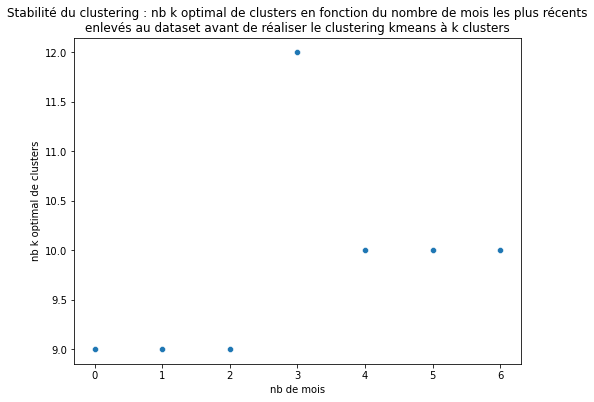

In [701]:
max_months = 6

# Initialisation du dictionnaire des nb de clusters optimaux d'après coeff de silhouette
k_optim_list = {}
k_optim_list[0] = 9
silh_optim_list = {}

# Run sur différents datasets réduits
for monthdelta in range(1,max_months+1,1):
    prepare_data_and_run_clustering_silh(monthdelta)

# Visualisation de l'évolution des nb de clusters optimaux
plt.figure(figsize=(8,6)),
plt.title('Stabilité du clustering : \
nb k optimal de clusters en fonction \
du nombre de mois les plus récents\n\
enlevés au dataset avant de réaliser le clustering \
kmeans à k clusters')
sns.scatterplot(x = list(k_optim_list.keys()),
y = list(k_optim_list.values()))
plt.xlabel('nb de mois')
plt.ylabel('nb k optimal de clusters')
plt.show()

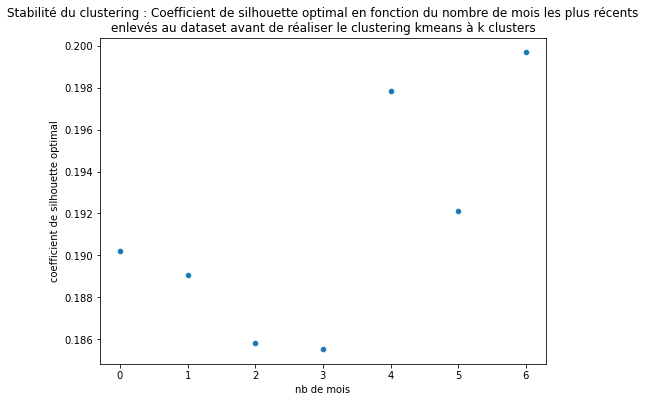

In [703]:
silh_optim_list[0] = 0.19022671793368134

# Visualisation de l'évolution des coeff de silhouette
plt.figure(figsize=(8,6)),
plt.title('Stabilité du clustering : \
Coefficient de silhouette optimal en fonction \
du nombre de mois les plus récents\n\
enlevés au dataset avant de réaliser le clustering \
kmeans à k clusters')
sns.scatterplot(x = list(silh_optim_list.keys()),
y = list(silh_optim_list.values()))
plt.xlabel('nb de mois')
plt.ylabel('coefficient de silhouette optimal')
plt.show()

## 4.2. Evaluation de la stabilité des clusters via ARI, i.e. stabilité du clustering des individus

In [812]:
def prepare_data_and_run_clustering_ARI(monthdelta):
    ''' 
    Fonction permettant de réduire les données aux commandes passées
    avant le "date la plus récente - x mois" (où x est défini par la
    variable "monthdelta"), de les préparer (feature engineering, 
    transformation, standardisation, ...), d'effectuer un 
    clustering k-means à k=9, et de calculer le score ARI par rapport
    aux cluster_labels de référence
    '''
    global df_cluster_compar
    
    print('#### Restriction de l\'extension temporelle des données de base pour monthdelta = {} ####'\
         .format(monthdelta))
    merged_df = base_data[base_data['order_approved_at'] < most_recent_date_ref-pd.DateOffset(months=monthdelta)]
    # Verif:
    print('base_data shape:', base_data.shape)
    print('time restricted base data:', merged_df.shape)
    
    # Création du nouveau df avec données pour clustering
    print('-' * 100)
    print('#### Création du nouveau dataframe \'data\' dont les index sont \
    les \'customer_unique_id\' des données temporellement réduites####')
    data = pd.DataFrame()
        # Ajout customer_unique_id en tant qu'index
    data['customer_unique_id'] = merged_df.customer_unique_id.unique().tolist()
    data = data.set_index('customer_unique_id')
        # verif
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('-' * 100)

    # Ajout de 'mean_payment_sequential', 
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('mean_payment_sequential', 'payment_sequential', pd.Series.mean))
        # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')\
        ['payment_sequential'].agg(pd.Series.mean).to_frame()
        # renommage de la variable ajoutée
    add_var.rename(columns={'payment_sequential': 'mean_payment_sequential'}, inplace=True)
        # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
        # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)
     
    # Ajout de 'mean_payment_installments'
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('mean_payment_installments', 'payment_installments', pd.Series.mean))
        # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')\
        ['payment_installments'].agg(pd.Series.mean).to_frame()
        # renommage de la variable ajoutée
    add_var.rename(columns={'payment_installments': 'mean_payment_installments'},
                   inplace=True)
        # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
        # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)
        
    # Ajout de 'nb_product_categ'
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('nb_product_categ', 'product_category_recateg', pd.Series.nunique))
        # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')\
        ['product_category_recateg'].agg(pd.Series.nunique).to_frame()
        # renommage de la variable ajoutée
    add_var.rename(columns={'product_category_recateg': 'nb_product_categ'},
                   inplace=True)
        # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
        # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout de last_review_score
    print('#### ajout de {} à partir de {} ####'.format('last_review_score', 'review_score'))
        # isolation/création variable à ajouter
    add_var = merged_df.sort_values('review_creation_date')\
        .groupby('customer_unique_id')['review_score'].last().to_frame()
        # renommage de la variable ajoutée
    add_var.rename(columns={'review_score': 'last_review_score'}, inplace=True)
        # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
        # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout Récence et Ancienneté
        # Définition de la date la plus récente
    most_recent_date = max(max(merged_df.order_purchase_timestamp),
                   max(merged_df.order_approved_at),
                   max(merged_df.order_delivered_carrier_date),
                   max(merged_df.order_delivered_customer_date))
    print('most_recent_date:', most_recent_date)
        # Ajout Récence (Recency(days))
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('Recency(days)', 'order_purchase_timestamp',
                  lambda x: (most_recent_date - x.max()) / np.timedelta64(1, "D")))
            # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')['order_purchase_timestamp']\
        .agg(lambda x: (most_recent_date - x.max()) / np.timedelta64(1, "D")).to_frame()
            # renommage de la variable ajoutée
    add_var.rename(columns={'order_purchase_timestamp': 'Recency(days)'}, inplace=True)
            # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
            # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)         
        # Ajout Ancienneté (Seniority(days))
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('Seniority(days)', 'order_purchase_timestamp',
                  lambda x: (most_recent_date - x.min()) / np.timedelta64(1, "D")))
            # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')['order_purchase_timestamp']\
        .agg(lambda x: (most_recent_date - x.min()) / np.timedelta64(1, "D")).to_frame()
            # renommage de la variable ajoutée
    add_var.rename(columns={'order_purchase_timestamp': 'Seniority(days)'}, inplace=True)
            # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
            # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)
    
    # Ajout nb total de commandes passées par le client sur l'ensemble de la période (nb_orders) 
    print('#### ajout de {} à partir de {} via la fonction d\'agrégation \"{}\"####'\
          .format('nb_orders', 'order_id', pd.Series.nunique))
        # isolation/création variable à ajouter
    add_var = merged_df.groupby('customer_unique_id')\
        ['order_id'].agg(pd.Series.nunique).to_frame()
        # renommage de la variable ajoutée
    add_var.rename(columns={'order_id': 'nb_orders'}, inplace=True)
        # Ajout au df data
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left')
        # Verif
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)
    
    # Ajout de Fréquence d'achat (Frequency(days))
    print('#### ajout de {} à partir de {} ####'\
          .format('Frequency(days)', 'Recency, Seniority et nb_orders'))
    data['Frequency(days)'] = (data['Seniority(days)'] - data['Recency(days)']) / data.nb_orders
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout montant panier moyen (mean_order_amount)
    print('#### ajout de mean_order_amount à partir de order_id et payment_value ####')
    add_var = merged_df[merged_df.order_item_id < 1.5]\
        .groupby(['customer_unique_id','order_id'])\
        ['payment_value'].sum().to_frame()\
        .groupby('customer_unique_id')['payment_value'].mean().to_frame()
    add_var.rename(columns={'payment_value': 'mean_order_amount'}, inplace=True)
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout volume d'achat moyen (mean_nb_items)
    print('#### ajout de mean_nb_items à partir de order_id et order_item_id ####')
    add_var = merged_df.groupby(['customer_unique_id','order_id'])\
        ['order_item_id'].max().to_frame()\
        .groupby('customer_unique_id')['order_item_id'].mean().to_frame()
    add_var.rename(columns={'order_item_id': 'mean_nb_items'}, inplace=True)
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout de temps moyen entre création panier et transaction (mean_ and min_ approvement-purchase_timedelta)
        # Création de approvement-purchase_timedelta dans merged_df
    merged_df['approvement-purchase_timedelta(min)'] =\
        (merged_df.order_approved_at - merged_df.order_purchase_timestamp)\
        / np.timedelta64(1, "m")
        # Ajout de mean_approvement-purchase_timedelta dans data
    print('#### ajout de mean_approvement-purchase_timedelta(mins) à partir de \
    order_id et approvement-purchase_timedelta(min) ####')
    add_var = merged_df.groupby(['customer_unique_id','order_id'])\
        ['approvement-purchase_timedelta(min)'].mean().to_frame()\
        .groupby('customer_unique_id')\
        ['approvement-purchase_timedelta(min)'].mean().to_frame()
    add_var.rename(columns={'approvement-purchase_timedelta(min)': 'mean_approvement-purchase_timedelta(mins)'},
                   inplace=True)
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # Ajout de délai moyen de livraison estimé (mean_estimated_delivery_timelapse(days))
        # Ajout estimated_delivery_timelapse(days) dans merged_df
    merged_df['estimated_delivery_timelapse(days)'] =\
        (merged_df.order_estimated_delivery_date - merged_df.order_purchase_timestamp)\
        / np.timedelta64(1, "D")
        # Ajout mean_estimated_delivery_timelapse(days) à data
    print('#### ajout de mean_estimated_delivery_timelapse(days) à partir de \
    order_id et estimated_delivery_timelapse(days) ####')
    add_var = merged_df.groupby(['customer_unique_id','order_id'])\
        ['estimated_delivery_timelapse(days)'].mean().to_frame().\
        groupby('customer_unique_id')['estimated_delivery_timelapse(days)'].mean().to_frame()
    add_var.rename(columns={'estimated_delivery_timelapse(days)': 'mean_estimated_delivery_timelapse(days)'},
                   inplace=True)
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    # consommateur local ou non
        # Ajout Local_consumer à merged df
    merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)
        # Ajout Local_consumer_grade à data
    print('#### ajout de Local_consumer_grade à partir de order_id, \
    order_item_id et Local_consumer ####')
    add_var = merged_df.groupby(['customer_unique_id','order_id', 'order_item_id'])\
        ['Local_consumer'].mean().to_frame()\
        .groupby('customer_unique_id')['Local_consumer'].mean().to_frame()
    add_var.rename(columns={'Local_consumer': 'Local_consumer_grade'}, inplace=True)
    data = pd.merge(data, add_var, left_index=True, right_index=True, how='left') 
    print('variable to add - df shape:', add_var.shape)
    print('data shape:', data.shape)
    print('data unique indices:', data.index.nunique())
    print('data columns:', data.columns.tolist())
    print('-' * 100)

    print('----------- FEATURE ENGINEERING DONE!! -----------')
    
    # Transformation logarithmique
    print('-' * 100)
    print('#### Transformation logarithmique ####')
    cols_to_log_transform = ['mean_order_amount',
                             'mean_approvement-purchase_timedelta(mins)']
    for f in cols_to_log_transform:
        data[f] = data[f].apply(lambda x : np.log(1+x))
    print('data shape:', data.shape)
    print('-' * 100)    
    
    # restriction du df en entrées aux features d'intérêt
    print('-' * 100)
    print('#### Suppression features non utiles ####')
    data_restricted = data[['mean_payment_sequential', 'mean_payment_installments',
       'nb_product_categ', 'last_review_score', 'Recency(days)', 'nb_orders',
       'Frequency(days)', 'mean_order_amount', 'mean_nb_items',
       'mean_approvement-purchase_timedelta(mins)',
       'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']]
    print('data shape:', data.shape)
    print('-' * 100)
    
    # suppression de l'outlier
    if '8d50f5eadf50201ccdcedfb9e2ac8455' in data_restricted.index:
        data_restricted = data_restricted.drop('8d50f5eadf50201ccdcedfb9e2ac8455')   
        
    # standardisation
    print('#### Standardisation ####')
    std_scale = preprocessing.StandardScaler().fit(data_restricted)
    data_std_restricted = std_scale.transform(data_restricted)
    print('shape data_std_restricted: ', data_std_restricted.shape)
    print('-' * 100)

        # Run du kmeans à k=9 clusters
    print('#### Run du kmeans à k=9 clusters ####')
    print('-' * 100)
    optim_kmeans_clusterer_i = KMeans(n_clusters=9, random_state=10, init='k-means++')
    optim_kmeans_cluster_labels_i = optim_kmeans_clusterer_i.fit_predict(data_std_restricted)
    
        # Création df avec les résultats du nouveau clustering
    print('#### Création df avec les résultats du nouveau clustering ####')
    df_cluster_i = pd.DataFrame(optim_kmeans_cluster_labels_i)
    df_cluster_i = df_cluster_i.rename(columns={0:'cluster_-{}months'.format(monthdelta)})
    df_cluster_i['customer_unique_id'] = pd.DataFrame(data_restricted).index
    print('shape df_cluster_i: ', df_cluster_i.shape)
    print('-' * 100)
    
        # Concaténation des résultats sur df_cluster_compar
    print('#### Concaténation des résultats sur df_cluster_compar ####')
    df_cluster_compar = pd.merge(df_cluster_compar, df_cluster_i, on='customer_unique_id', how='left')
    print('shape df_cluster_compar: ', df_cluster_compar.shape)
    print('-' * 100)
    
        # Calcul ARI et ajout à ARI_list
    print('#### Calcul ARI ####')
    df_temp = df_cluster_compar[['base_cluster', 'cluster_-{}months'.format(monthdelta)]]
    df_temp.dropna(inplace=True)
    ARI_i = adjusted_rand_score(df_temp['base_cluster'], df_temp['cluster_-{}months'.format(monthdelta)])
    ARI_list[monthdelta] = ARI_i
    nb_indiv[monthdelta] = df_temp.shape[0]
    print('-' * 100)
    print('-' * 100)

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Détermination du clustering et cluster_labels de base
----------------------------------------------------------------------------------------------------
#### Restriction de l'extension temporelle des données de base pour monthdelta = 0 ####
base_data shape: (119151, 31)
time restricted base data: (119150, 31)
----------------------------------------------------------------------------------------------------
#### Création du nouveau dataframe 'data' dont les index sont     les 'customer_unique_id' des données temporellement réduites####
data shape: (96095, 0)
data unique indices: 96095
----------------------------------------------------------------------------------------------------
#### ajout de mean_payment_sequential à partir de payment_sequential via la fonction d'agrégation "<fu

<ipython-input-791-5459de73d61e>:183: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\


variable to add - df shape: (96095, 1)
data shape: (96095, 11)
data unique indices: 96095
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)']
----------------------------------------------------------------------------------------------------
#### ajout de mean_estimated_delivery_timelapse(days) à partir de order_id et estimated_delivery_timelapse(days) ####


<ipython-input-791-5459de73d61e>:200: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


variable to add - df shape: (96095, 1)
data shape: (96095, 12)
data unique indices: 96095
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
----------------------------------------------------------------------------------------------------
#### ajout de Local_consumer_grade à partir de order_id, order_item_id et Local_consumer ####


<ipython-input-791-5459de73d61e>:217: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


variable to add - df shape: (96095, 1)
data shape: (96095, 13)
data unique indices: 96095
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
data shape: (96095, 13)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
#### Suppression features non utiles ####
data shape: (96095, 

<ipython-input-809-9dff1ff3e0eb>:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\


variable to add - df shape: (96094, 1)
data shape: (96094, 11)
data unique indices: 96094
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)']
----------------------------------------------------------------------------------------------------
#### ajout de mean_estimated_delivery_timelapse(days) à partir de order_id et estimated_delivery_timelapse(days) ####


<ipython-input-809-9dff1ff3e0eb>:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


variable to add - df shape: (96094, 1)
data shape: (96094, 12)
data unique indices: 96094
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
----------------------------------------------------------------------------------------------------
#### ajout de Local_consumer_grade à partir de order_id, order_item_id et Local_consumer ####


<ipython-input-809-9dff1ff3e0eb>:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


variable to add - df shape: (96094, 1)
data shape: (96094, 13)
data unique indices: 96094
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
data shape: (96094, 13)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
#### Suppression features non utiles ####
data shape: (96094, 

<ipython-input-809-9dff1ff3e0eb>:291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.dropna(inplace=True)


variable to add - df shape: (94519, 1)
data shape: (94519, 1)
data unique indices: 94519
data columns: ['mean_payment_sequential']
----------------------------------------------------------------------------------------------------
#### ajout de mean_payment_installments à partir de payment_installments via la fonction d'agrégation "<function Series.mean at 0x0000025761F48820>"####
variable to add - df shape: (94519, 1)
data shape: (94519, 2)
data unique indices: 94519
data columns: ['mean_payment_sequential', 'mean_payment_installments']
----------------------------------------------------------------------------------------------------
#### ajout de nb_product_categ à partir de product_category_recateg via la fonction d'agrégation "<function IndexOpsMixin.nunique at 0x0000025761B05DC0>"####
variable to add - df shape: (94519, 1)
data shape: (94519, 3)
data unique indices: 94519
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ']
----------------

<ipython-input-809-9dff1ff3e0eb>:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\


variable to add - df shape: (94519, 1)
data shape: (94519, 11)
data unique indices: 94519
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)']
----------------------------------------------------------------------------------------------------
#### ajout de mean_estimated_delivery_timelapse(days) à partir de order_id et estimated_delivery_timelapse(days) ####


<ipython-input-809-9dff1ff3e0eb>:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


variable to add - df shape: (94519, 1)
data shape: (94519, 12)
data unique indices: 94519
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
----------------------------------------------------------------------------------------------------
#### ajout de Local_consumer_grade à partir de order_id, order_item_id et Local_consumer ####


<ipython-input-809-9dff1ff3e0eb>:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


variable to add - df shape: (94519, 1)
data shape: (94519, 13)
data unique indices: 94519
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
data shape: (94519, 13)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
#### Suppression features non utiles ####
data shape: (94519, 

<ipython-input-809-9dff1ff3e0eb>:291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.dropna(inplace=True)


variable to add - df shape: (86449, 1)
data shape: (86449, 1)
data unique indices: 86449
data columns: ['mean_payment_sequential']
----------------------------------------------------------------------------------------------------
#### ajout de mean_payment_installments à partir de payment_installments via la fonction d'agrégation "<function Series.mean at 0x0000025761F48820>"####
variable to add - df shape: (86449, 1)
data shape: (86449, 2)
data unique indices: 86449
data columns: ['mean_payment_sequential', 'mean_payment_installments']
----------------------------------------------------------------------------------------------------
#### ajout de nb_product_categ à partir de product_category_recateg via la fonction d'agrégation "<function IndexOpsMixin.nunique at 0x0000025761B05DC0>"####
variable to add - df shape: (86449, 1)
data shape: (86449, 3)
data unique indices: 86449
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ']
----------------

<ipython-input-809-9dff1ff3e0eb>:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\


variable to add - df shape: (86449, 1)
data shape: (86449, 11)
data unique indices: 86449
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)']
----------------------------------------------------------------------------------------------------
#### ajout de mean_estimated_delivery_timelapse(days) à partir de order_id et estimated_delivery_timelapse(days) ####


<ipython-input-809-9dff1ff3e0eb>:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


variable to add - df shape: (86449, 1)
data shape: (86449, 12)
data unique indices: 86449
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
----------------------------------------------------------------------------------------------------
#### ajout de Local_consumer_grade à partir de order_id, order_item_id et Local_consumer ####


<ipython-input-809-9dff1ff3e0eb>:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


variable to add - df shape: (86449, 1)
data shape: (86449, 13)
data unique indices: 86449
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
data shape: (86449, 13)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
#### Suppression features non utiles ####
data shape: (86449, 

<ipython-input-809-9dff1ff3e0eb>:291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.dropna(inplace=True)


variable to add - df shape: (81055, 1)
data shape: (81055, 1)
data unique indices: 81055
data columns: ['mean_payment_sequential']
----------------------------------------------------------------------------------------------------
#### ajout de mean_payment_installments à partir de payment_installments via la fonction d'agrégation "<function Series.mean at 0x0000025761F48820>"####
variable to add - df shape: (81055, 1)
data shape: (81055, 2)
data unique indices: 81055
data columns: ['mean_payment_sequential', 'mean_payment_installments']
----------------------------------------------------------------------------------------------------
#### ajout de nb_product_categ à partir de product_category_recateg via la fonction d'agrégation "<function IndexOpsMixin.nunique at 0x0000025761B05DC0>"####
variable to add - df shape: (81055, 1)
data shape: (81055, 3)
data unique indices: 81055
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ']
----------------

<ipython-input-809-9dff1ff3e0eb>:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\
<ipython-input-809-9dff1ff3e0eb>:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


#### ajout de mean_estimated_delivery_timelapse(days) à partir de order_id et estimated_delivery_timelapse(days) ####
variable to add - df shape: (81055, 1)
data shape: (81055, 12)
data unique indices: 81055
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
----------------------------------------------------------------------------------------------------
#### ajout de Local_consumer_grade à partir de order_id, order_item_id et Local_consumer ####
variable to add - df shape:

<ipython-input-809-9dff1ff3e0eb>:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


 (81055, 1)
data shape: (81055, 13)
data unique indices: 81055
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
data shape: (81055, 13)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
#### Suppression features non utiles ####
data shape: (81055, 13)
-----------------------

<ipython-input-809-9dff1ff3e0eb>:291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.dropna(inplace=True)


variable to add - df shape: (75747, 1)
data shape: (75747, 1)
data unique indices: 75747
data columns: ['mean_payment_sequential']
----------------------------------------------------------------------------------------------------
#### ajout de mean_payment_installments à partir de payment_installments via la fonction d'agrégation "<function Series.mean at 0x0000025761F48820>"####
variable to add - df shape: (75747, 1)
data shape: (75747, 2)
data unique indices: 75747
data columns: ['mean_payment_sequential', 'mean_payment_installments']
----------------------------------------------------------------------------------------------------
#### ajout de nb_product_categ à partir de product_category_recateg via la fonction d'agrégation "<function IndexOpsMixin.nunique at 0x0000025761B05DC0>"####
variable to add - df shape: (75747, 1)
data shape: (75747, 3)
data unique indices: 75747
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ']
----------------

<ipython-input-809-9dff1ff3e0eb>:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\
<ipython-input-809-9dff1ff3e0eb>:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


variable to add - df shape: (75747, 1)
data shape: (75747, 12)
data unique indices: 75747
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
----------------------------------------------------------------------------------------------------
#### ajout de Local_consumer_grade à partir de order_id, order_item_id et Local_consumer ####
variable to add - df shape: (75747, 1)
data shape: (75747, 13)


<ipython-input-809-9dff1ff3e0eb>:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


data unique indices: 75747
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consumer_grade']
----------------------------------------------------------------------------------------------------
----------- FEATURE ENGINEERING DONE!! -----------
----------------------------------------------------------------------------------------------------
#### Transformation logarithmique ####
data shape: (75747, 13)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
#### Suppression features non utiles ####
data shape: (75747, 13)
-----------------------------------------------------------

<ipython-input-809-9dff1ff3e0eb>:291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.dropna(inplace=True)


variable to add - df shape: (68178, 1)
data shape: (68178, 1)
data unique indices: 68178
data columns: ['mean_payment_sequential']
----------------------------------------------------------------------------------------------------
#### ajout de mean_payment_installments à partir de payment_installments via la fonction d'agrégation "<function Series.mean at 0x0000025761F48820>"####
variable to add - df shape: (68178, 1)
data shape: (68178, 2)
data unique indices: 68178
data columns: ['mean_payment_sequential', 'mean_payment_installments']
----------------------------------------------------------------------------------------------------
#### ajout de nb_product_categ à partir de product_category_recateg via la fonction d'agrégation "<function IndexOpsMixin.nunique at 0x0000025761B05DC0>"####
variable to add - df shape: (68178, 1)
data shape: (68178, 3)
data unique indices: 68178
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ']
----------------

<ipython-input-809-9dff1ff3e0eb>:187: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['approvement-purchase_timedelta(min)'] =\
<ipython-input-809-9dff1ff3e0eb>:204: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['estimated_delivery_timelapse(days)'] =\


variable to add - df shape: (68178, 1)
data shape: (68178, 12)
data unique indices: 68178
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)']
----------------------------------------------------------------------------------------------------
#### ajout de Local_consumer_grade à partir de order_id, order_item_id et Local_consumer ####
variable to add - df shape: (68178, 1)
data shape: (68178, 13)
data unique indices: 68178
data columns: ['mean_payment_sequential', 'mean_payment_installments', 'nb_product_categ', 'last_review_score', 'Recency(days)', 'Seniority(days)', 'nb_orders', 'Frequency(days)', 'mean_order_amount', 'mean_nb_items', 'mean_approvement-purchase_timedelta(mins)', 'mean_estimated_delivery_timelapse(days)', 'Local_consum

<ipython-input-809-9dff1ff3e0eb>:221: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['Local_consumer'] = np.where(merged_df.customer_state == merged_df.seller_state, 1, 0)


data shape: (68178, 13)
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
#### Suppression features non utiles ####
data shape: (68178, 13)
----------------------------------------------------------------------------------------------------
#### Standardisation ####
shape data_std_restricted:  (68177, 12)
----------------------------------------------------------------------------------------------------
#### Run du kmeans à k=9 clusters ####
----------------------------------------------------------------------------------------------------
#### Création df avec les résultats du nouveau clustering ####
----------------------------------------------------------------------------------------------------
shape df_cluster_i:  (68177, 2)
#### Concaténation des résultats sur df_cluster_compar ####
--------------------------------------------

<ipython-input-809-9dff1ff3e0eb>:291: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp.dropna(inplace=True)


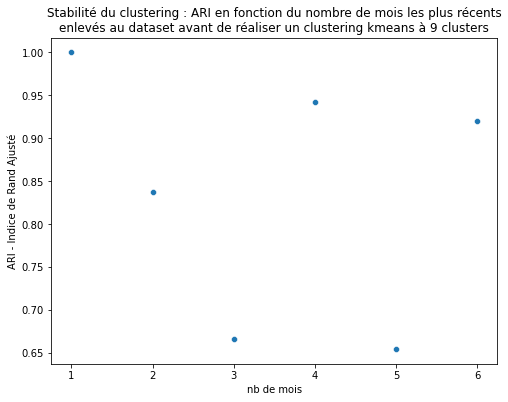

----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
Visualisation des résultats
----------------------------------------------------------------------------------------------------


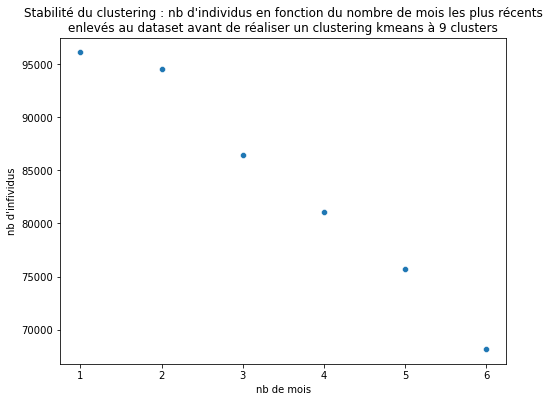

In [811]:
# Détermination du clustering et cluster_labels de base
print('-' * 100)
print('-' * 100)
print('Détermination du clustering et cluster_labels de base')
print('-' * 100)
    # préparation données
prepare_data_for_clustering(0)
    # Run du kmeans à k=9 clusters
print('#### Run du kmeans à k=9 clusters ####')
print('-' * 100)
optim_kmeans_clusterer = KMeans(n_clusters=9, random_state=10, init='k-means++')
optim_kmeans_cluster_labels = optim_kmeans_clusterer.fit_predict(data_std_restricted)
    # Définition cluster_labels de base
reference_cluster_labels = optim_kmeans_cluster_labels
df_cluster = pd.DataFrame(reference_cluster_labels)
df_cluster = df_cluster.rename(columns={0:'base_cluster'})
df_cluster['customer_unique_id'] = data_restricted.index

# Initialisation du dictionnaire des ARI
ARI_list = {} # stabilité des étiquettes
# Initialisation du dictionnaire compilant le nb d'individus traité par chaque dataset
nb_indiv = {}

# Initialisation df_cluster_compar
df_cluster_compar = df_cluster.copy()

# Run sur différents datasets réduits
print('-' * 100)
print('-' * 100)
print('Calcul des ARI sur les différents datasets réduits temporellement')
print('-' * 100)
for monthdelta in range(1,7,1):
    prepare_data_and_run_clustering_ARI(monthdelta)

# Visualisation de l'évolution des ARI
print('-' * 100)
print('-' * 100)
print('Visualisation des résultats')
print('-' * 100)
plt.figure(figsize=(8,6)),
plt.title('Stabilité du clustering : \
ARI en fonction du nombre de mois les plus récents\n\
enlevés au dataset avant de réaliser un clustering \
kmeans à 9 clusters')
sns.scatterplot(x = list(ARI_list.keys()),
y = list(ARI_list.values()))
plt.xlabel('nb de mois')
plt.ylabel('ARI - Indice de Rand Ajusté')
plt.show()

# Visualisation du nb d'indiv
print('-' * 100)
print('-' * 100)
print('Visualisation des résultats')
print('-' * 100)
plt.figure(figsize=(8,6)),
plt.title('Stabilité du clustering : \
nb d\'individus en fonction du nombre de mois les plus récents\n\
enlevés au dataset avant de réaliser un clustering \
kmeans à 9 clusters')
sns.scatterplot(x = list(nb_indiv.keys()),
y = list(nb_indiv.values()))
plt.xlabel('nb de mois')
plt.ylabel('nb d\'infividus')
plt.show()

**BILAN:**
- nb clusters: stable sur 2 mois, change à partir de 3 mois
- coeff de silhouette: décroissance + marquée à 2 et 3 mois, mais non exceptionnelle (ca. 0.004)
- ARI: ca. 84% des paires de points encore correctement groupées à 2 mois, mais cela décroit à ca. 67% à 3 mois... sachant que ARI, tel que calculé ici, ne prend pas en compte les clients non classés (i.e. les nouveaux clients)
- nb clients: 98% des clients toujours segmentés à 2 mois, tombe à 90% à 3 mois (mais ce paramètre dépend de la dynamique de création de nouveaux clients)

**==> Fréquence de MAJ conseillée = 3 mois**